In [364]:
InstallPackages = True 
if InstallPackages:
    import sys
    !{sys.executable} -m pip install pandas
    !{sys.executable} -m pip install pyarrow


python(78605) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


^C
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/pip/__main__.py", line 24, in <module>
    sys.exit(_main())
             ^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/main.py", line 79, in main
    return command.main(cmd_args)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/base_command.py", line 101, in main
    return self._main(args)
           ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/base_command.py", line 236, in _main
    self.handle_pip_version_check(options)
  File "/opt/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/req_command.py", line 177, in handle_pip_version_check
    session = self._build_session(
              ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages

python(78615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [864]:
#Import necessary libraries
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [597]:
warnings.filterwarnings('ignore')

In [1023]:
#Function to read parquet file
def read_parquet_file(file_path):
    df = pd.read_parquet(file_path)
    return df

In [1025]:
#Importing document
file_path = '/Users/salmahoumane/Desktop/data_2024-07-24.parquet'
df = read_parquet_file(file_path)

In [368]:
df.head()

,UNITNO,SCAN_DATETIME,EVENT_CODE,EVENT_REASON,WEIGHT,VOLUME,STACKABLE,SMALL,HAZARDOUS,BELT,...,RAW_DESTINATION_DEPOT_ID,RAW_SCAN_DEPOT_ID,DESTINATION_DEPOT_ID,SCAN_DEPOT_ID,DESTINATION_SCAN_DATETIME,FIRST_SCAN_DATETIME,NEXT_DEPOT_ID,NEXT_SCAN_DATETIME,PREVIOUS_DEPOT_ID,PREVIOUS_SCAN_DATETIME
51848741,10000002228,2024-06-24 15:57:55.000,0,0,0.76,NaN,False,True,False,True,...,DE 232,DE 840,230,840,2024-06-25 07:35:29.695,2024-06-24 15:57:55,1,2024-06-25 00:29:01.873,-1,NaT
67686568,10000002228,2024-06-25 00:29:01.873,2,29,0.76,NaN,False,True,False,True,...,DE 232,DE 001,230,1,2024-06-25 07:35:29.695,2024-06-24 15:57:55,230,2024-06-25 07:35:29.695,840,2024-06-24 15:57:55.000
26512515,10000002228,2024-06-25 07:35:29.695,2,0,0.76,NaN,False,True,False,True,...,DE 232,DE 230,230,230,2024-06-25 07:35:29.695,2024-06-24 15:57:55,-1,NaT,1,2024-06-25 00:29:01.873
56421212,10000002260,2024-06-20 15:45:05.000,0,0,1.86,3.33,False,True,False,True,...,DE 232,DE 410,230,410,2024-06-21 06:02:23.301,2024-06-20 15:45:05,85,2024-06-20 18:52:10.014,-1,NaT
33657623,10000002260,2024-06-20 18:52:10.014,2,0,1.86,3.33,False,True,False,True,...,DE 232,DE 085,230,85,2024-06-21 06:02:23.301,2024-06-20 15:45:05,230,2024-06-21 06:02:23.301,410,2024-06-20 15:45:05.000


In [369]:
# Print the column names
print("Column names:")
print(df.columns)

Column names:
Index(['UNITNO', 'SCAN_DATETIME', 'EVENT_CODE', 'EVENT_REASON', 'WEIGHT',
       'VOLUME', 'STACKABLE', 'SMALL', 'HAZARDOUS', 'BELT',
       'DESTINATION_ZIPCODE', 'EVENT_TYPE', 'RAW_DESTINATION_DEPOT_ID',
       'RAW_SCAN_DEPOT_ID', 'DESTINATION_DEPOT_ID', 'SCAN_DEPOT_ID',
       'DESTINATION_SCAN_DATETIME', 'FIRST_SCAN_DATETIME', 'NEXT_DEPOT_ID',
       'NEXT_SCAN_DATETIME', 'PREVIOUS_DEPOT_ID', 'PREVIOUS_SCAN_DATETIME'],
      dtype='object')


In [370]:
#Existing depots
# Find unique values of DESTINATION_DEPOT_ID
unique_destination_depots = df['DESTINATION_DEPOT_ID'].unique()

# Print the unique values
print("Unique values of DESTINATION_DEPOT_ID:")
print(unique_destination_depots)

Unique values of DESTINATION_DEPOT_ID:
[230 730 870 100 350 700 300 200 600 620 850 540 130 410 430 490 720 500
 820 260 840 400 460 680 800 150 420 190 120 480 560 250 690 710 290 270
 790 470 370 280 780 330 890 860 450 650 160 170 810 750 770 360 880 440
 670 210 110 140 610 660 630 740 180 760 640 830 220 550   1]


# Filtering for specific depots

In [1026]:
#Filter Data for Pilot Depots
pilot_depots = [120, 100, 170, 230]
df_filtered = df[df['DESTINATION_DEPOT_ID'].isin(pilot_depots)]

In [373]:
#Checking if filtering was done correctly
# Find unique values of DESTINATION_DEPOT_ID
unique_destination_depots = df_filtered['DESTINATION_DEPOT_ID'].unique()

# Print the unique values
print("Unique values of DESTINATION_DEPOT_ID:")
print(unique_destination_depots)


Unique values of DESTINATION_DEPOT_ID:
[230 100 120 170]


In [374]:
# Data Exploration
print(df_filtered.head())
print(df_filtered.describe())
print(df_filtered.isnull().sum())

               UNITNO           SCAN_DATETIME  EVENT_CODE  EVENT_REASON  \
51848741  10000002228 2024-06-24 15:57:55.000           0             0   
67686568  10000002228 2024-06-25 00:29:01.873           2            29   
26512515  10000002228 2024-06-25 07:35:29.695           2             0   
56421212  10000002260 2024-06-20 15:45:05.000           0             0   
33657623  10000002260 2024-06-20 18:52:10.014           2             0   

          WEIGHT  VOLUME  STACKABLE  SMALL  HAZARDOUS  BELT  ...  \
51848741    0.76     NaN      False   True      False  True  ...   
67686568    0.76     NaN      False   True      False  True  ...   
26512515    0.76     NaN      False   True      False  True  ...   
56421212    1.86    3.33      False   True      False  True  ...   
33657623    1.86    3.33      False   True      False  True  ...   

         RAW_DESTINATION_DEPOT_ID RAW_SCAN_DEPOT_ID DESTINATION_DEPOT_ID  \
51848741                   DE 232            DE 840             

## Are unitno unique identifiers of each row?

In [376]:
# Check the frequency of each UNITNO
unitno_counts = df_filtered['UNITNO'].value_counts()

# Filter and print UNITNOs that are repeated
repeated_unitnos = unitno_counts[unitno_counts > 1]

# Print a subset of the repeated UNITNOs and their counts
print("Repeated UNITNOs and their counts (showing first 10):")
print(repeated_unitnos.head(10)) 

# Calculate the mean of repetitions
mean_repetitions = repeated_unitnos.mean()
# Print the mean of repetitions
print("\nMean number of repetitions for repeated UNITNOs:", mean_repetitions)

Repeated UNITNOs and their counts (showing first 10):
UNITNO
10408033709    29
50763094370    27
73539826768    21
68374036826    21
17417816142    21
10767057736    19
10407996528    19
10407079798    18
50023603298    18
50023603369    18
Name: count, dtype: int64

Mean number of repetitions for repeated UNITNOs: 3.2312596137132137


So we see that each unit has more than one event, or an event that is repeated!

The average amount of times each unitno is repeated is 3.2 meaning each parcel is scanned on average a little over 3 times. This should be taken into consideration when we look at volumes, weights... as they will be REPEATED. 

In [383]:
# Group by UNITNO and filter for those with counts greater than 1
unitno_counts = df_filtered.groupby('UNITNO').size()
repeated_unitnos = unitno_counts[unitno_counts > 1].index

# Filter the dataframe to only include these repeated UNITNOs
repeated_df = df_filtered[df_filtered['UNITNO'].isin(repeated_unitnos)]

event_reason_counts = (
    repeated_df.groupby('UNITNO')['EVENT_REASON']
    .apply(lambda x: len(x.unique()) == 1)
)
#Extract UNITNOs with consistent EVENT_REASONs
consistent_unitnos = event_reason_counts[event_reason_counts].index

# Print UNITNOs with consistent EVENT_REASONs for two or more repetitions
print("\nUNITNOs with consistent EVENT_REASONs for two or more repetitions (showing first 10):")
for unitno in consistent_unitnos[:10]:
    event_reason = repeated_df[repeated_df['UNITNO'] == unitno]['EVENT_REASON'].iloc[0]
    print(f"UNITNO: {unitno}, EVENT_REASON: {event_reason}")


UNITNOs with consistent EVENT_REASONs for two or more repetitions (showing first 10):
UNITNO: 10000002260, EVENT_REASON: 0
UNITNO: 10000002279, EVENT_REASON: 0
UNITNO: 10000002307, EVENT_REASON: 0
UNITNO: 10000002338, EVENT_REASON: 0
UNITNO: 10000002404, EVENT_REASON: 0
UNITNO: 10000002477, EVENT_REASON: 0
UNITNO: 10000002509, EVENT_REASON: 0
UNITNO: 10000002521, EVENT_REASON: 0
UNITNO: 10000002554, EVENT_REASON: 0
UNITNO: 10000002578, EVENT_REASON: 0


We see that Event_Reason 0 is repeated multiple times for the same parcels. 
### What is event_reason 0?

# Creation of On_Time Criteria

We redefine the "on time" criteria to mark deliveries as "on time" if they arrive before 10 AM the day after the first scan.

In [1027]:
# Filter data for pilot depots
pilot_depots = [120, 100, 170, 230]
df_filtered = df[df['DESTINATION_DEPOT_ID'].isin(pilot_depots)]

# Convert datetime columns to datetime type
df_filtered['DESTINATION_SCAN_DATETIME'] = pd.to_datetime(df_filtered['DESTINATION_SCAN_DATETIME'])
df_filtered['FIRST_SCAN_DATETIME'] = pd.to_datetime(df_filtered['FIRST_SCAN_DATETIME'])

In [1028]:
# Extract extra features from the datetime columns
df_filtered['SCAN_WEEK_OF_YEAR'] = df_filtered['SCAN_DATETIME'].dt.strftime("%V").astype(str).astype(int)
df_filtered['SCAN_DAY_OF_WEEK'] = df_filtered['SCAN_DATETIME'].dt.dayofweek
df_filtered['IS_FRIDAY'] = df_filtered['SCAN_DATETIME'].dt.dayofweek == 4
df_filtered['SCAN_HOUR'] = df_filtered['SCAN_DATETIME'].dt.hour
df_filtered['SCAN_MINUTE'] = df_filtered['SCAN_DATETIME'].dt.minute
df_filtered['SCAN_BEFORE_10'] = df_filtered['SCAN_HOUR'] < 10 

# Feature engineering
df_filtered['VOLUME_MISSING'] = df_filtered['VOLUME'].isna()

In [1029]:
# Define a function to calculate the cutoff time
def next_10am_after(scan_time, IS_FRIDAY, scan_hour):
    if scan_hour < 10:
        # If the scan is before 10 AM, set cutoff to the next day's 10 AM
        next_day = scan_time + pd.Timedelta(days=1)
        cutoff_time = next_day.replace(hour=10, minute=0, second=0, microsecond=0)
    else:
        if IS_FRIDAY:
            # If the scan is on Friday and after 10 AM, set cutoff to Monday 10 AM
            next_monday = scan_time + pd.Timedelta(days=(7 - scan_time.weekday())) # 7 - weekday() gives the days to Monday
            cutoff_time = next_monday.replace(hour=10, minute=0, second=0, microsecond=0)
        else:
            # Otherwise, set cutoff to the next day's 10 AM
            next_day = scan_time + pd.Timedelta(days=1)
            cutoff_time = next_day.replace(hour=10, minute=0, second=0, microsecond=0)
    return cutoff_time

# Apply the function to calculate the cutoff time for each row
df_filtered['cutoff_time'] = df_filtered.apply(
    lambda row: next_10am_after(row['FIRST_SCAN_DATETIME'], row['IS_FRIDAY'], row['SCAN_HOUR']),
    axis=1
)

# Create the `on_time` variable based on the new criteria
df_filtered['ON_TIME'] = df_filtered['DESTINATION_SCAN_DATETIME'] <= df_filtered['cutoff_time']

In [403]:
# Checking if the new `on_time` column was added correctly
print(df_filtered.head())

               UNITNO           SCAN_DATETIME  EVENT_CODE  EVENT_REASON  \
51848741  10000002228 2024-06-24 15:57:55.000           0             0   
67686568  10000002228 2024-06-25 00:29:01.873           2            29   
26512515  10000002228 2024-06-25 07:35:29.695           2             0   
56421212  10000002260 2024-06-20 15:45:05.000           0             0   
33657623  10000002260 2024-06-20 18:52:10.014           2             0   

          WEIGHT  VOLUME  STACKABLE  SMALL  HAZARDOUS  BELT  ...  \
51848741    0.76     NaN      False   True      False  True  ...   
67686568    0.76     NaN      False   True      False  True  ...   
26512515    0.76     NaN      False   True      False  True  ...   
56421212    1.86    3.33      False   True      False  True  ...   
33657623    1.86    3.33      False   True      False  True  ...   

         PREVIOUS_DEPOT_ID  PREVIOUS_SCAN_DATETIME SCAN_WEEK_OF_YEAR  \
51848741                -1                     NaT                26

In [1030]:
# Drop duplicate UNITNO entries, keeping only the first occurrence
df_unique = df_filtered.drop_duplicates(subset='UNITNO', keep='first')

# Analyzing Characteristics

In [410]:
# Convert boolean 'ON_TIME' to integer (1 for True, 0 for False) for correlation calculation
df_unique['ON_TIME_INT'] = df_unique['ON_TIME'].astype(int)

# Select numerical columns only
numerical_columns = df_unique.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df_unique[numerical_columns].corr()

# Extract correlations with 'ON_TIME_INT'
on_time_correlation = correlation_matrix['ON_TIME_INT'].sort_values(ascending=False)

/var/folders/6s/jtyjmwvn4wz6q7x39lwzwzsm0000gn/T/ipykernel_47187/2220710060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['ON_TIME_INT'] = df_unique['ON_TIME'].astype(int)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


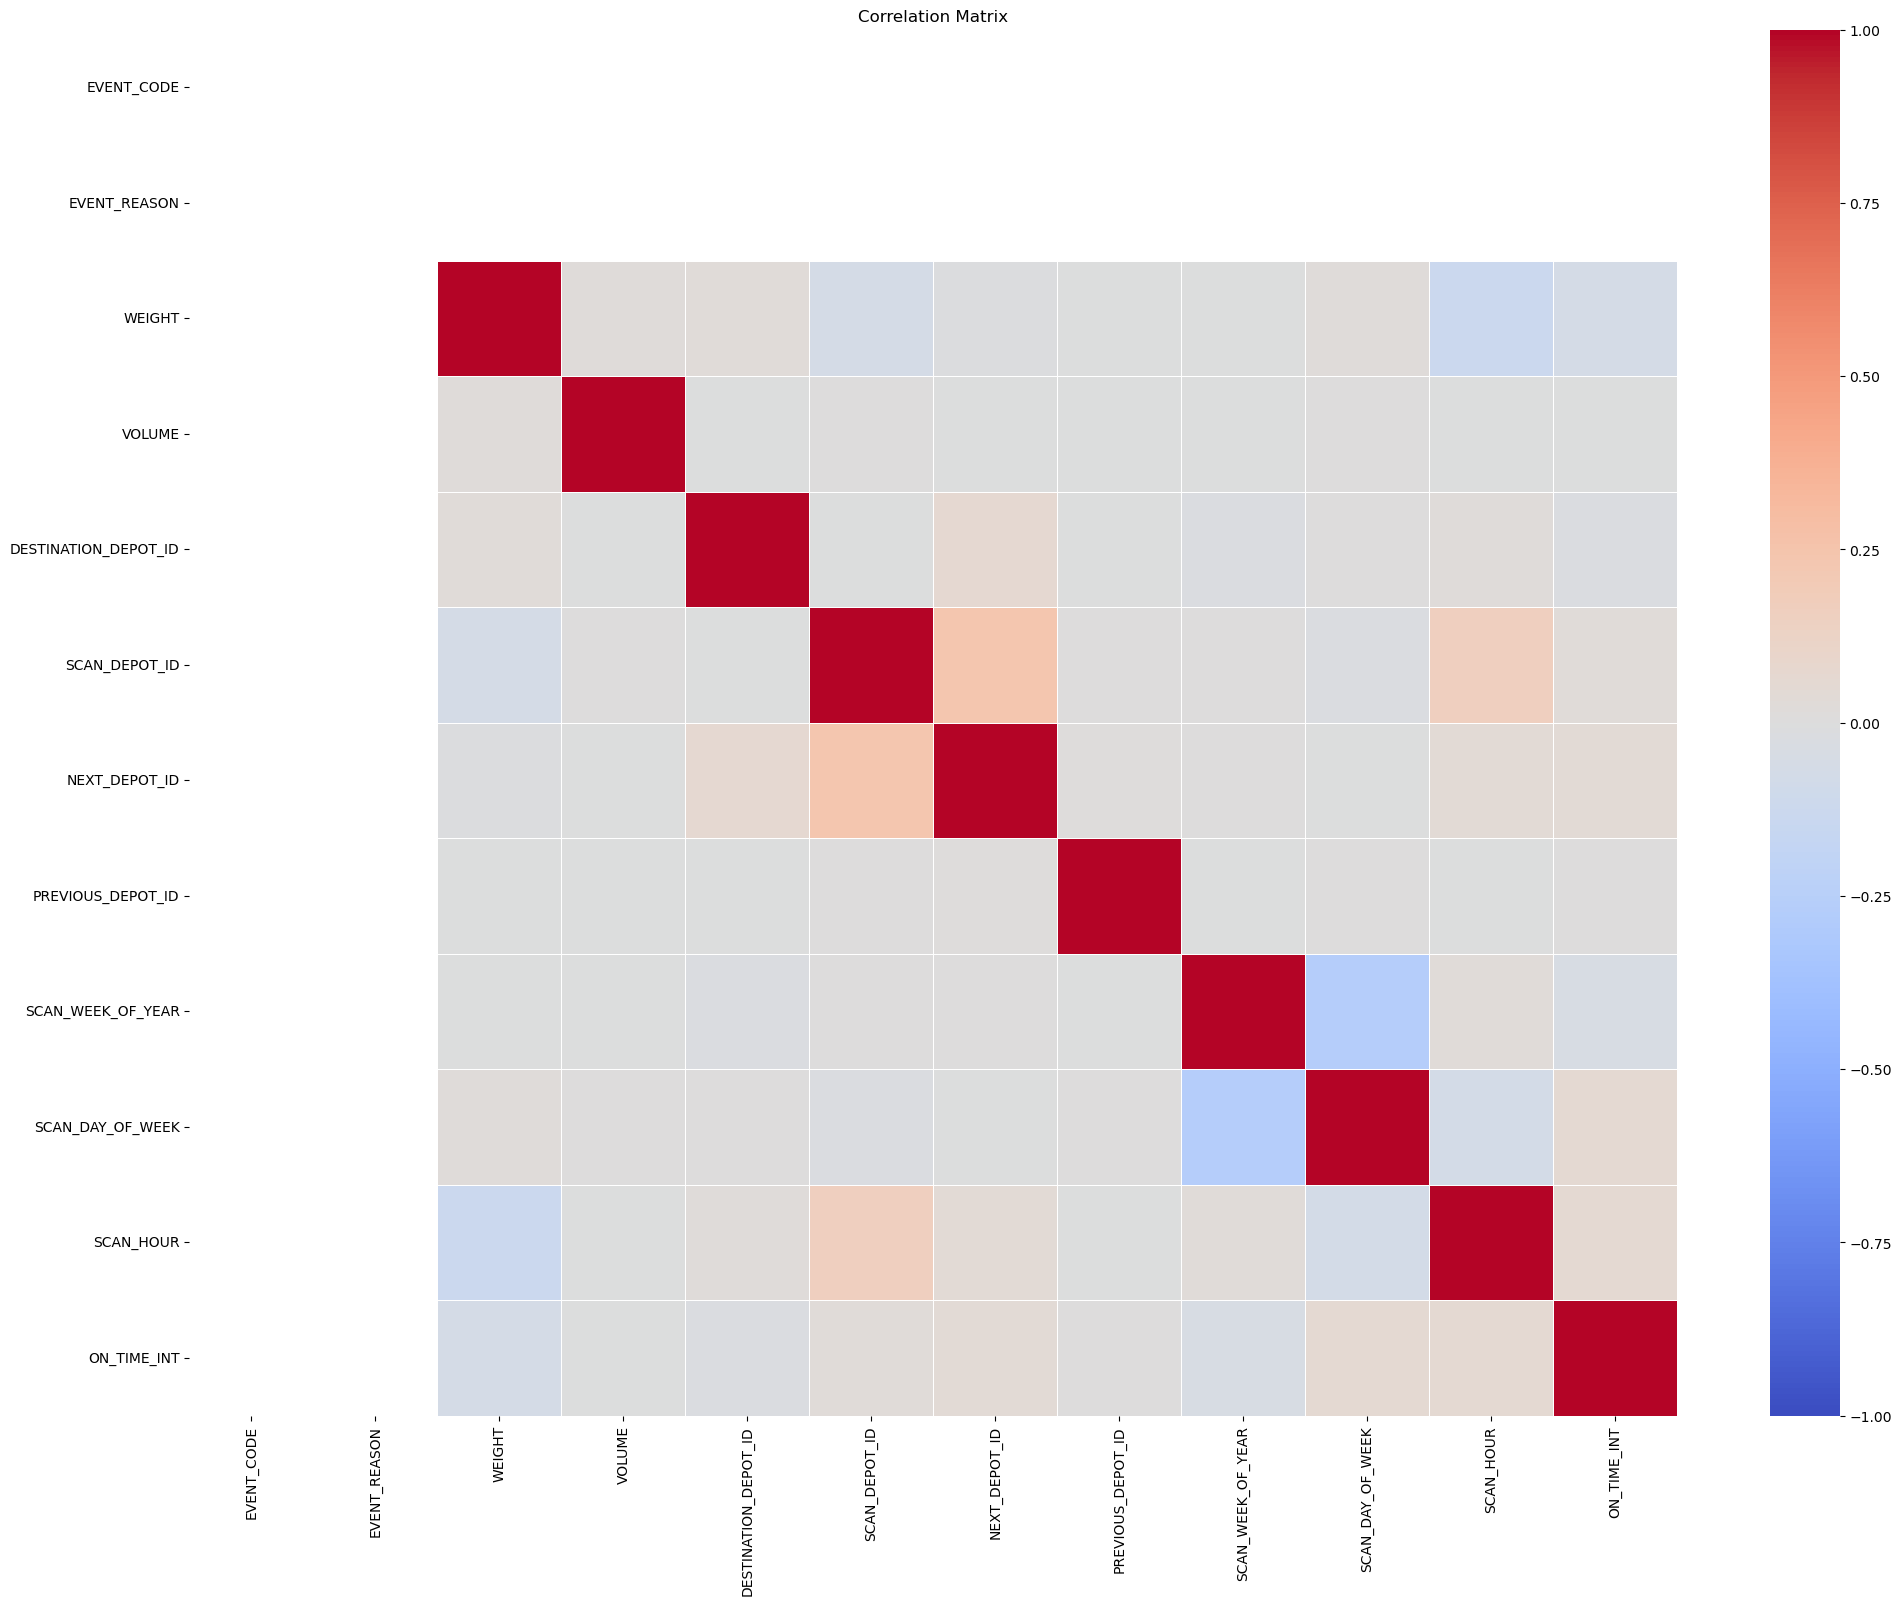

In [418]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(max(8, len(numerical_columns) * 2), max(6, len(numerical_columns) * 1.5)))  # Dynamically adjust size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We see that scan week of the year and weight might have a negative correlation with on_time. 

   ON_TIME    WEIGHT    VOLUME  STACKABLE     SMALL  HAZARDOUS      BELT
0    False  8.207750  9.216529        0.0  0.318822    0.00344  0.999024
1     True  6.870051  8.710833        0.0  0.317030    0.00492  0.997956


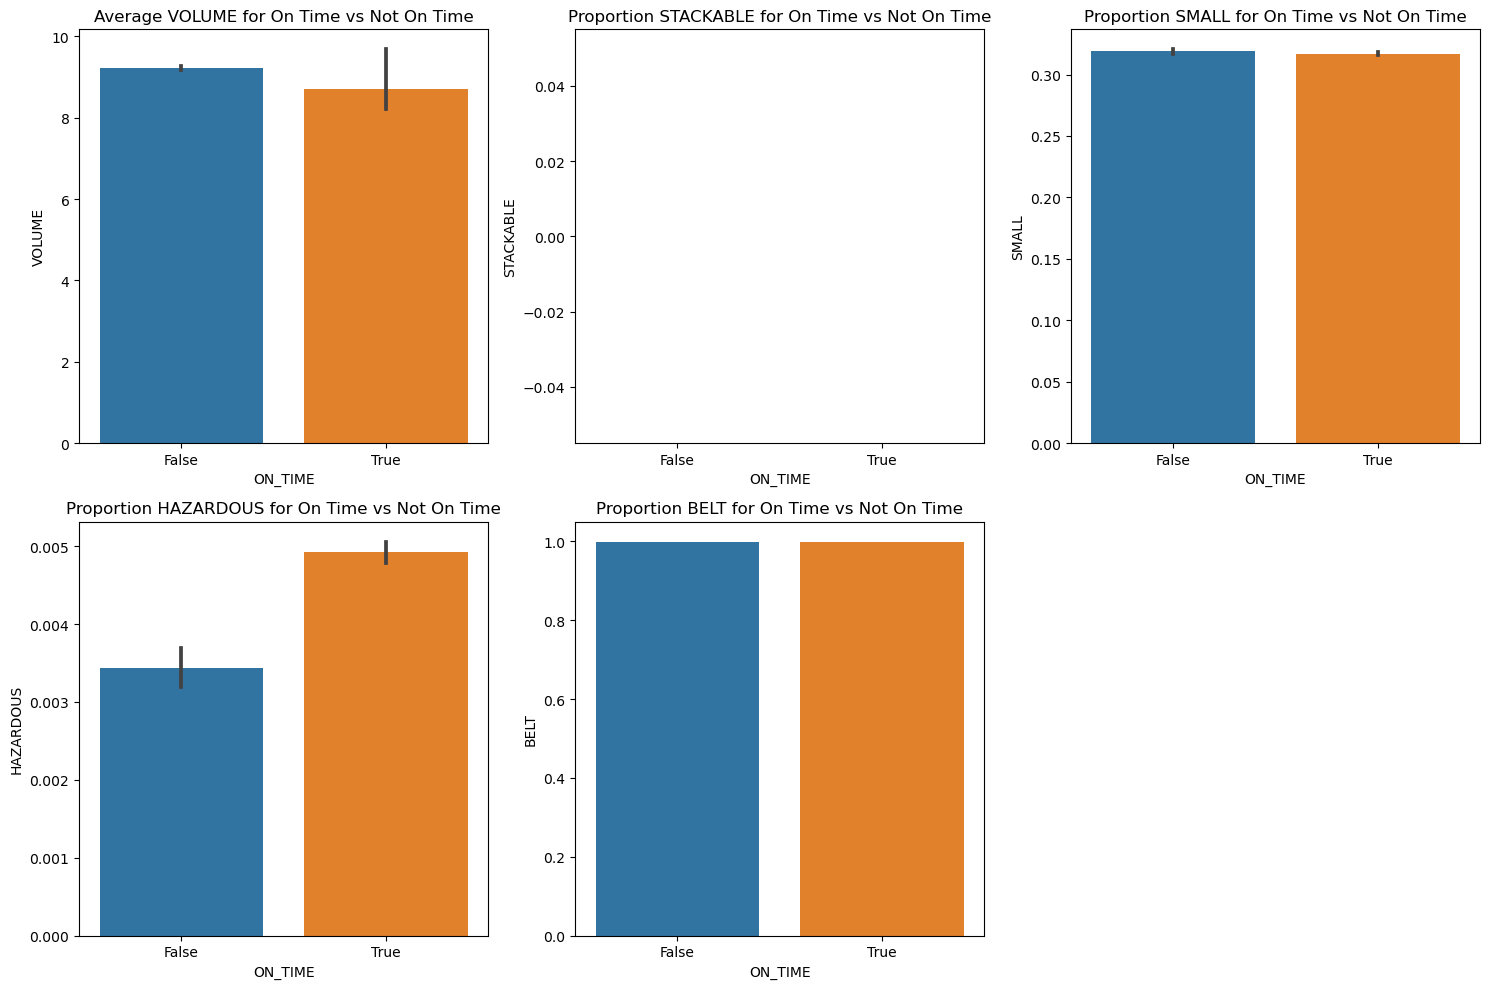

In [429]:
# Create a table showing the average value of each characteristic for on_time and not_on_time deliveries
characteristics = ['WEIGHT', 'VOLUME', 'STACKABLE', 'SMALL', 'HAZARDOUS', 'BELT']
table = df_unique.groupby('ON_TIME')[characteristics].mean().reset_index()

# Print the table
print(table)

# Plot other characteristics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.barplot(ax=axes[0, 0], x='ON_TIME', y='VOLUME', data=df_unique)
axes[0, 0].set_title('Average VOLUME for On Time vs Not On Time')

sns.barplot(ax=axes[0, 1], x='ON_TIME', y='STACKABLE', data=df_unique)
axes[0, 1].set_title('Proportion STACKABLE for On Time vs Not On Time')

sns.barplot(ax=axes[0, 2], x='ON_TIME', y='SMALL', data=df_unique)
axes[0, 2].set_title('Proportion SMALL for On Time vs Not On Time')

sns.barplot(ax=axes[1, 0], x='ON_TIME', y='HAZARDOUS', data=df_unique)
axes[1, 0].set_title('Proportion HAZARDOUS for On Time vs Not On Time')

sns.barplot(ax=axes[1, 1], x='ON_TIME', y='BELT', data=df_unique)
axes[1, 1].set_title('Proportion BELT for On Time vs Not On Time')

# Hide the last subplot (2,2) as we have only 5 characteristics
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

The table and graphs show the average values of different characteristics for on-time and not-on-time deliveries. The table summarizes the averages, while the graphs visually depict the impact of each characteristic on the likelihood of a delivery being on time.
#### Weight and Volume
Weight and volume seem to be larger for those that are less likely to arrive on time but the different is only by respectively 2 and 1 units. 
#### Stackable
Stackable is not necessary for analysis because it is always false and never on time. 
#### Hazardous
Hazardous also seems to show very minimal effects. 
#### Small and belt
Small and Belt do not show any relevant differences. We might look into it but no promising results. 

# Analyzing Week of the year

In [441]:
# Get descriptive statistics for SCAN_WEEK_OF_YEAR
stats = df_unique['SCAN_WEEK_OF_YEAR'].describe()

print("Descriptive Statistics for SCAN_WEEK_OF_YEAR:")
print(stats)

Descriptive Statistics for SCAN_WEEK_OF_YEAR:
count    1.219612e+06
mean     2.712523e+01
std      1.297589e+00
min      2.500000e+01
25%      2.600000e+01
50%      2.700000e+01
75%      2.800000e+01
max      2.900000e+01
Name: SCAN_WEEK_OF_YEAR, dtype: float64


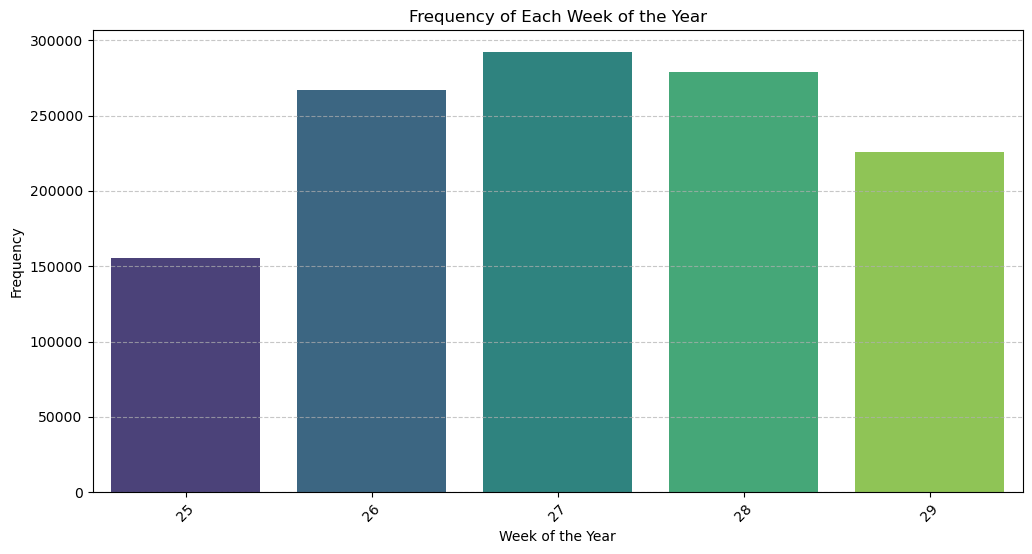

In [443]:
# Count frequencies of each week
frequency_counts = df_unique['SCAN_WEEK_OF_YEAR'].value_counts().sort_index()

# Create a DataFrame from the frequencies for plotting
frequency_df = frequency_counts.reset_index()
frequency_df.columns = ['SCAN_WEEK_OF_YEAR', 'Frequency']

# Plot the frequencies
plt.figure(figsize=(12, 6))
sns.barplot(data=frequency_df, x='SCAN_WEEK_OF_YEAR', y='Frequency', palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Frequency of Each Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### We only have values for week of the year between 25 and 29 so we should focus on those in the graph. 

This graph was created to check time trends, seasonalities... but we did not have enough data to make conclusions

# Analyzing Day of the week

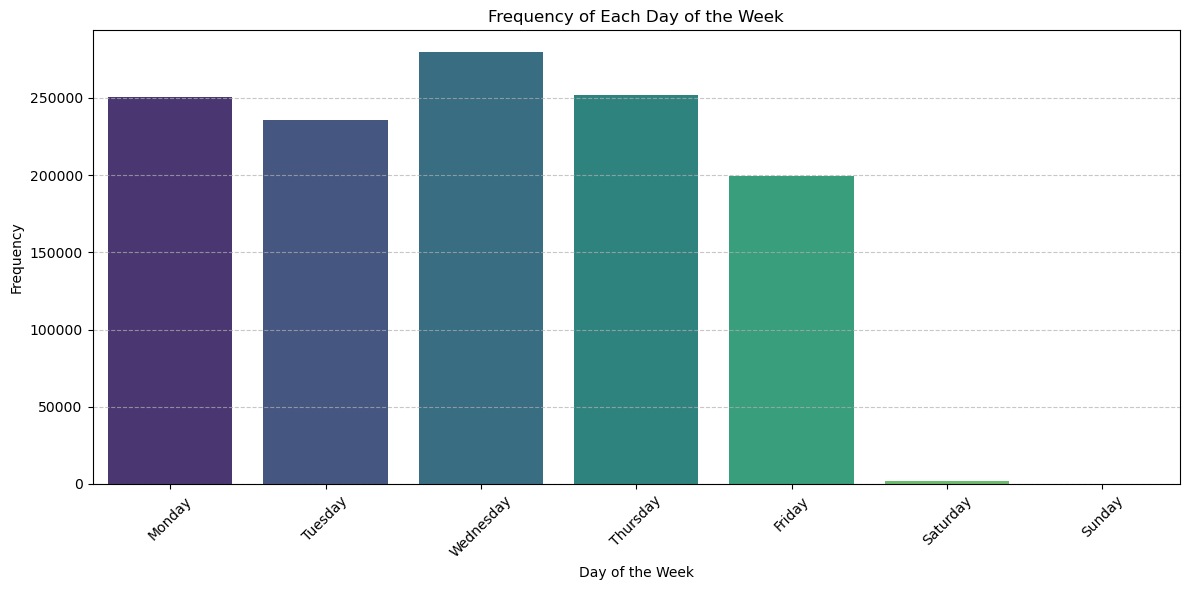

In [610]:
# Assuming df_unique is your DataFrame and 'SCAN_DATETIME' is in datetime format
df_unique['SCAN_DAY_OF_WEEK'] = df_unique['SCAN_DATETIME'].dt.dayofweek

# Map numeric days to day names
df_unique['SCAN_DAY_NAME'] = df_unique['SCAN_DAY_OF_WEEK'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Count frequencies of each day
day_frequency_counts = df_unique['SCAN_DAY_NAME'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).sort_index()

# Create a DataFrame from the frequencies for plotting
day_frequency_df = day_frequency_counts.reset_index()
day_frequency_df.columns = ['Day_of_Week', 'Frequency']

# Convert 'Day_of_Week' to categorical with an ordered list
day_frequency_df['Day_of_Week'] = pd.Categorical(day_frequency_df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], ordered=True)

# Sort by the categorical order
day_frequency_df = day_frequency_df.sort_values('Day_of_Week')

# Plot the frequencies
plt.figure(figsize=(12, 6))
sns.barplot(data=day_frequency_df, x='Day_of_Week', y='Frequency', palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Frequency of Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

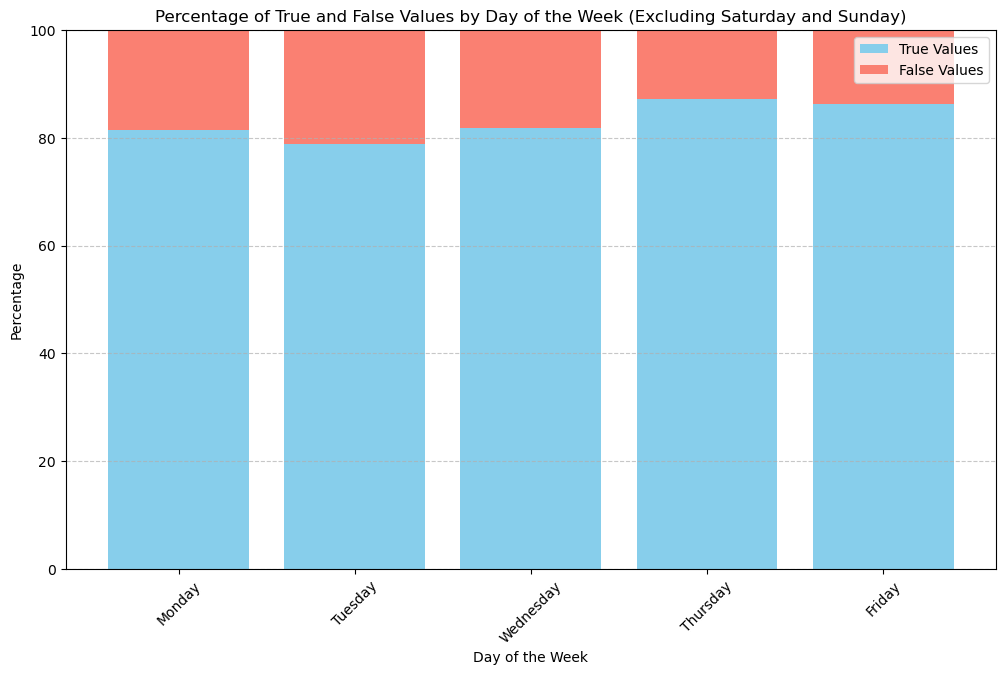

In [626]:
# Ensure 'SCAN_DATETIME' is in datetime format
df_unique['SCAN_DATETIME'] = pd.to_datetime(df_unique['SCAN_DATETIME'])

# Extract the day of the week
df_unique['SCAN_DAY_OF_WEEK'] = df_unique['SCAN_DATETIME'].dt.dayofweek

# Map numeric days to day names
df_unique['SCAN_DAY_NAME'] = df_unique['SCAN_DAY_OF_WEEK'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Ensure 'ON_TIME' column is boolean
df_unique['ON_TIME'] = df_unique['ON_TIME'].astype(bool)

# Calculate the percentage of True and False values for each day
day_stats = df_unique.groupby('SCAN_DAY_NAME')['ON_TIME'].agg(['mean', 'count']).reset_index()
day_stats['percentage_true'] = day_stats['mean'] * 100
day_stats['percentage_false'] = (1 - day_stats['mean']) * 100

# Define the order of the days and exclude Saturday and Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Filter out Saturday and Sunday
day_stats_filtered = day_stats[day_stats['SCAN_DAY_NAME'].isin(day_order)]

# Set the order of the days
day_stats_filtered['SCAN_DAY_NAME'] = pd.Categorical(day_stats_filtered['SCAN_DAY_NAME'], categories=day_order, ordered=True)
day_stats_filtered = day_stats_filtered.sort_values('SCAN_DAY_NAME')

# Plotting
plt.figure(figsize=(12, 7))

# Plot bars for True values
plt.bar(day_stats_filtered['SCAN_DAY_NAME'], day_stats_filtered['percentage_true'], 
        color='skyblue', label='True Values')

# Plot bars for False values on top of True values
plt.bar(day_stats_filtered['SCAN_DAY_NAME'], day_stats_filtered['percentage_false'], 
        bottom=day_stats_filtered['percentage_true'], color='salmon', label='False Values')

plt.xlabel('Day of the Week')
plt.ylabel('Percentage')
plt.title('Percentage of True and False Values by Day of the Week (Excluding Saturday and Sunday)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

TUESDAY has the highest number of not ON_TIME delivered and Wednesday has the highest number of deliveries in general: is it because those parcels fall back on wednesday?

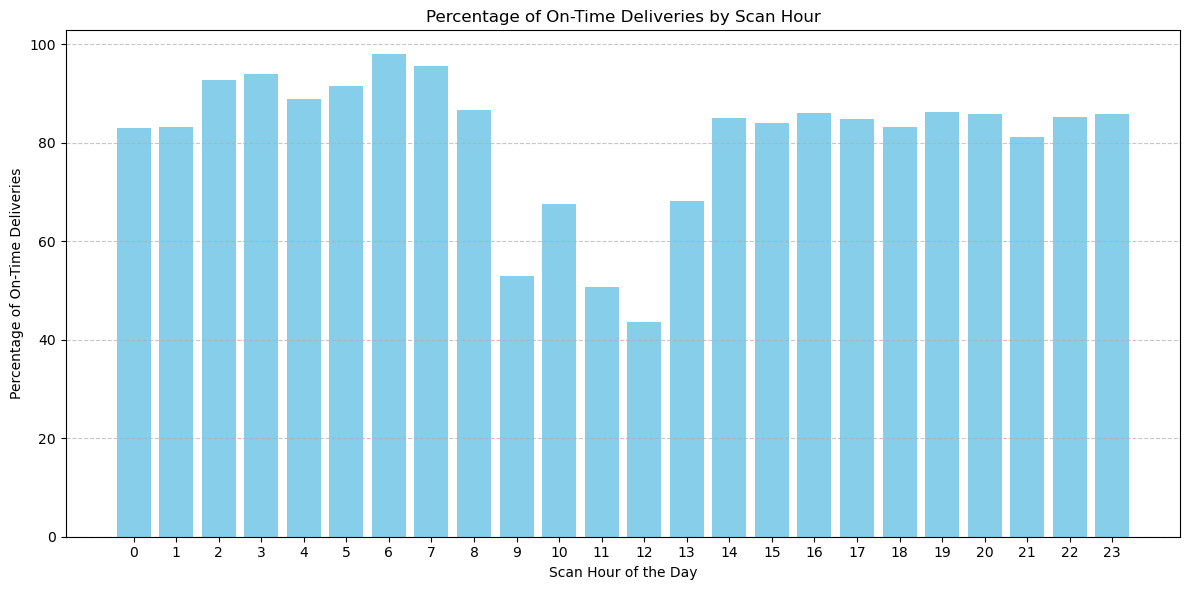

In [954]:
# Group by 'SCAN_HOUR' and calculate the percentage of on-time deliveries
on_time_counts = df_unique.groupby('SCAN_HOUR')['ON_TIME'].sum()
total_counts = df_unique.groupby('SCAN_HOUR').size()
percentage_on_time = (on_time_counts / total_counts) * 100

# Create a DataFrame for plotting
percentage_on_time_df = pd.DataFrame({
    'SCAN_HOUR': percentage_on_time.index,
    'Percentage_On_Time': percentage_on_time.values
})

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(percentage_on_time_df['SCAN_HOUR'], percentage_on_time_df['Percentage_On_Time'], color='skyblue')

# Customize the plot
plt.xlabel('Scan Hour of the Day')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Percentage of On-Time Deliveries by Scan Hour')
plt.xticks(range(24))  # Set x-ticks for each hour of the day
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Likelihood of being delivered on time drops if the parcel is scanned between 9 and 13.

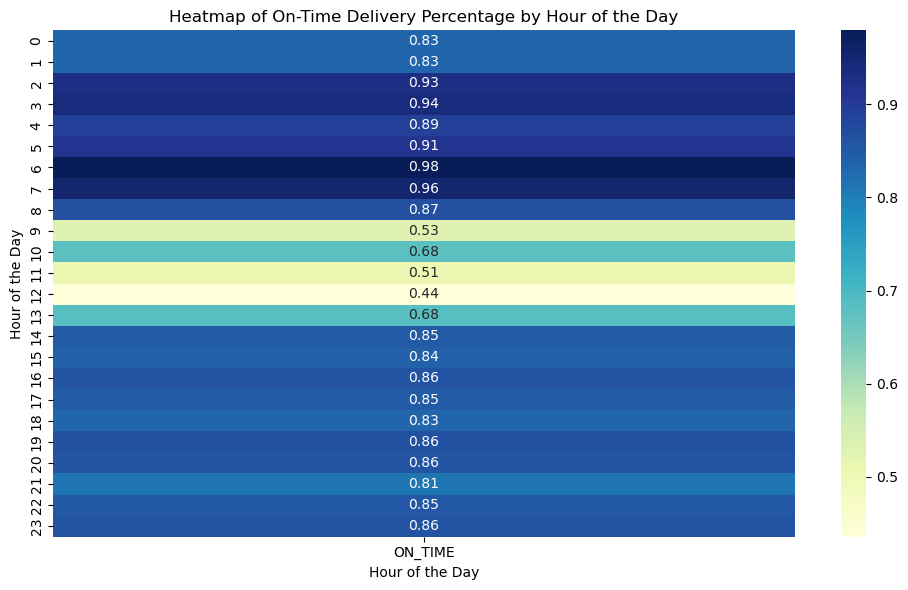

In [957]:
# Pivot the data for heatmap
heatmap_data = df_unique.pivot_table(index='SCAN_HOUR', values='ON_TIME', aggfunc='mean')

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Hour of the Day')
plt.title('Heatmap of On-Time Delivery Percentage by Hour of the Day')

# Show the plot
plt.tight_layout()
plt.show()

If the parcels are scanned between 9 and 13, they are less likely to be delivered on time.

In [960]:
# Group by 'SCAN_HOUR' and count occurrences
hourly_scan_counts = df_unique.groupby('SCAN_HOUR').size()

# Convert to DataFrame for easier plotting
hourly_scan_counts_df = hourly_scan_counts.reset_index(name='Count')

# Sort by hour for better plotting
hourly_scan_counts_df.sort_values('SCAN_HOUR', inplace=True)

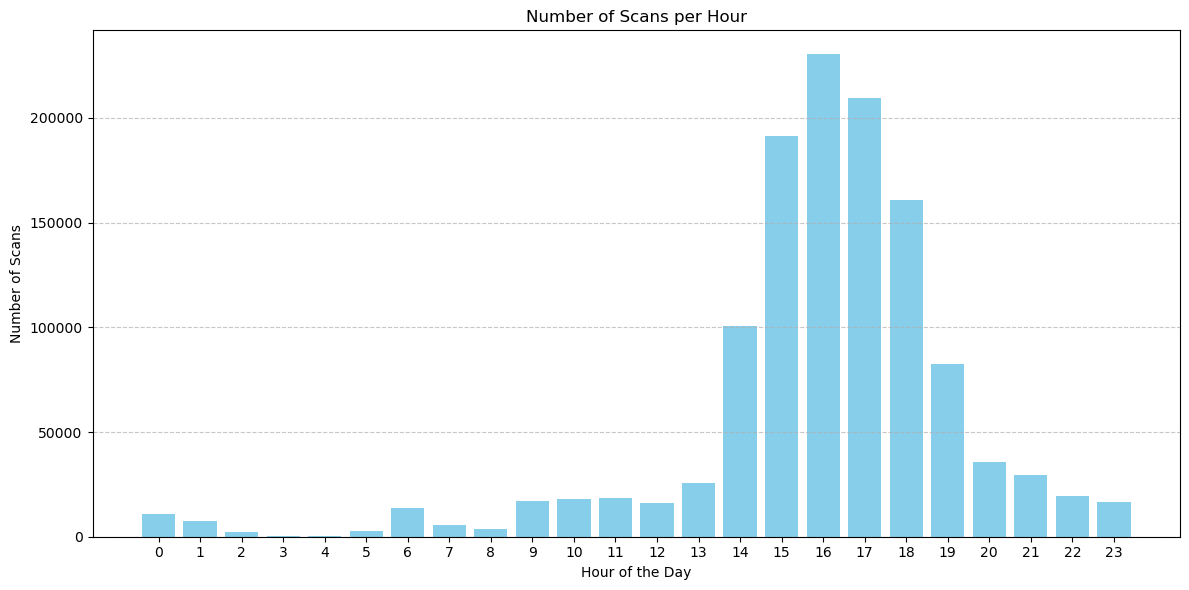

In [962]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hourly_scan_counts_df['SCAN_HOUR'], hourly_scan_counts_df['Count'], color='skyblue')

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Scans')
plt.title('Number of Scans per Hour')
plt.xticks(range(24))  # Ensure x-axis ticks represent each hour of the day
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Most parcels are scanned between 14 and 19.

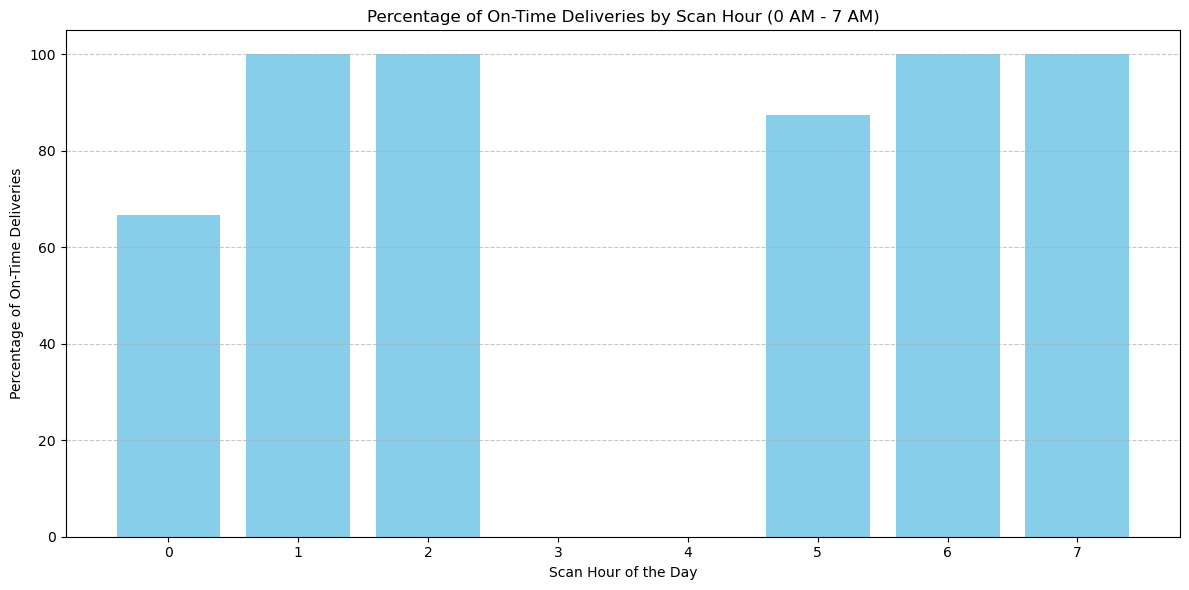

In [915]:
# Filter the data to include only hours between 0 and 7 (inclusive)
filtered_hours_df = df_filtered[(df_filtered['SCAN_HOUR'] >= 9) & (df_filtered['SCAN_HOUR'] <= 13)]

# Group by 'SCAN_HOUR' and calculate the percentage of on-time deliveries
on_time_counts = filtered_hours_df.groupby('SCAN_HOUR')['ON_TIME'].sum()
total_counts = filtered_hours_df.groupby('SCAN_HOUR').size()
percentage_on_time = (on_time_counts / total_counts) * 100

# Create a DataFrame for plotting
percentage_on_time_df = pd.DataFrame({
    'SCAN_HOUR': percentage_on_time.index,
    'Percentage_On_Time': percentage_on_time.values
}).reset_index()

# Sort the DataFrame by hour for better plotting
percentage_on_time_df.sort_values('SCAN_HOUR', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(percentage_on_time_df['SCAN_HOUR'], percentage_on_time_df['Percentage_On_Time'], color='skyblue')

# Customize the plot
plt.xlabel('Scan Hour of the Day')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Percentage of On-Time Deliveries by Scan Hour (0 AM - 7 AM)')
plt.xticks(range(0, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Parcels scanned before between 1 and 7am have a high chance of arrriving on time.

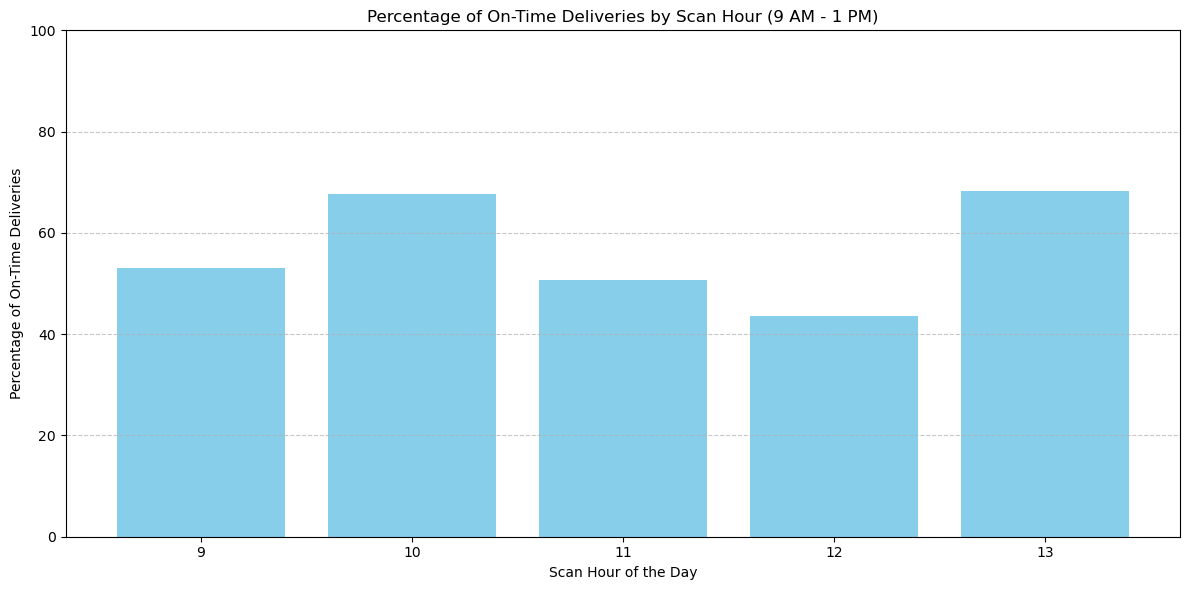

In [974]:
# Filter the data to include only hours between 9 and 13 (inclusive)
filtered_hours_df = df_unique[(df_unique['SCAN_HOUR'] >= 9) & (df_unique['SCAN_HOUR'] <= 13)]

# Group by 'SCAN_HOUR' and calculate the percentage of on-time deliveries
on_time_counts = filtered_hours_df.groupby('SCAN_HOUR')['ON_TIME'].sum()
total_counts = filtered_hours_df.groupby('SCAN_HOUR').size()
percentage_on_time = (on_time_counts / total_counts) * 100

# Create a DataFrame for plotting
percentage_on_time_df = pd.DataFrame({
    'SCAN_HOUR': percentage_on_time.index,
    'Percentage_On_Time': percentage_on_time.values
}).reset_index()

# Sort the DataFrame by hour for better plotting
percentage_on_time_df.sort_values('SCAN_HOUR', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(percentage_on_time_df['SCAN_HOUR'], percentage_on_time_df['Percentage_On_Time'], color='skyblue')

# Customize the plot
plt.xlabel('Scan Hour of the Day')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Percentage of On-Time Deliveries by Scan Hour (9 AM - 1 PM)')
plt.xticks(range(9, 14))  # Set x-ticks for hours between 9 and 13 (inclusive)
plt.ylim(0, 100)  # Ensure y-axis is between 0 and 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Parcels scanned between 9 and 13 have a less than 70% likelihood to be delivered on time.

In [976]:
# Map day numbers to day names
df_unique['SCAN_DAY_OF_WEEK'] = df_unique['SCAN_DATETIME'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_unique['SCAN_DAY_NAME'] = df_unique['SCAN_DAY_OF_WEEK'].map(lambda x: day_names[x])

# Verify the new column
print(df_unique[['SCAN_DAY_OF_WEEK', 'SCAN_DAY_NAME']].head())

          SCAN_DAY_OF_WEEK SCAN_DAY_NAME
51848741                 0        Monday
56421212                 3      Thursday
8319130                  1       Tuesday
76383910                 2     Wednesday
30334932                 2     Wednesday


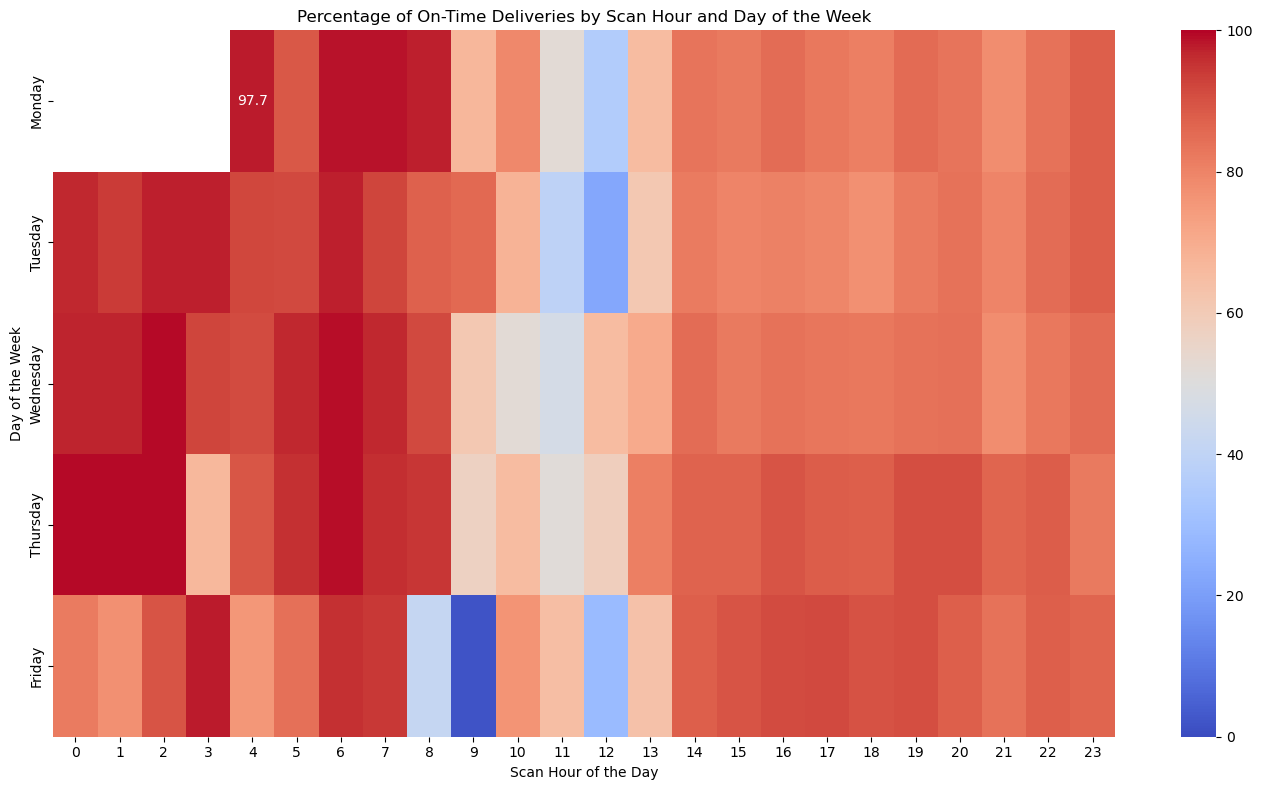

In [981]:
# Convert 'SCAN_DAY_OF_WEEK' from integer to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_unique['SCAN_DAY_NAME'] = df_unique['SCAN_DAY_OF_WEEK'].map(lambda x: day_names[x])

# Exclude Saturday and Sunday
df_unique = df_unique[~df_unique['SCAN_DAY_NAME'].isin(['Saturday', 'Sunday'])]

# Ensure 'SCAN_DAY_NAME' is a categorical type with proper ordering
df_unique['SCAN_DAY_NAME'] = df_unique['SCAN_DAY_NAME'].astype(pd.CategoricalDtype(categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
], ordered=True))

# Group by 'SCAN_HOUR' and 'SCAN_DAY_NAME' and calculate the percentage of on-time deliveries
on_time_counts = df_unique.groupby(['SCAN_HOUR', 'SCAN_DAY_NAME'])['ON_TIME'].sum()
total_counts = df_unique.groupby(['SCAN_HOUR', 'SCAN_DAY_NAME']).size()
percentage_on_time = (on_time_counts / total_counts) * 100

# Create a DataFrame for plotting
heatmap_data = pd.DataFrame({
    'SCAN_HOUR': percentage_on_time.index.get_level_values('SCAN_HOUR'),
    'SCAN_DAY_NAME': percentage_on_time.index.get_level_values('SCAN_DAY_NAME'),
    'Percentage_On_Time': percentage_on_time.values
})

# Pivot the data for heatmap
heatmap_pivot = heatmap_data.pivot(index='SCAN_DAY_NAME', columns='SCAN_HOUR', values='Percentage_On_Time')

# Ensure correct ordering of columns and index
heatmap_pivot = heatmap_pivot.reindex(
    columns=range(24),  # Assuming hours from 0 to 23
    index=pd.CategoricalIndex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        ordered=True
    )
)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, vmin=0, vmax=100)

# Customize the plot
plt.xlabel('Scan Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Percentage of On-Time Deliveries by Scan Hour and Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


No matter the day, parcels scanned between 9 and 13 are least likely to be delivered on time. Should the cutoff time be between 7 and 8?

In [990]:
# Create 'scan_minute_7' that only contains minute values if 'SCAN_HOUR' is 7
df_unique['scan_minute_7'] = df_unique.apply(
    lambda row: row['SCAN_MINUTE'] if row['SCAN_HOUR'] == 7 else None, axis=1
)

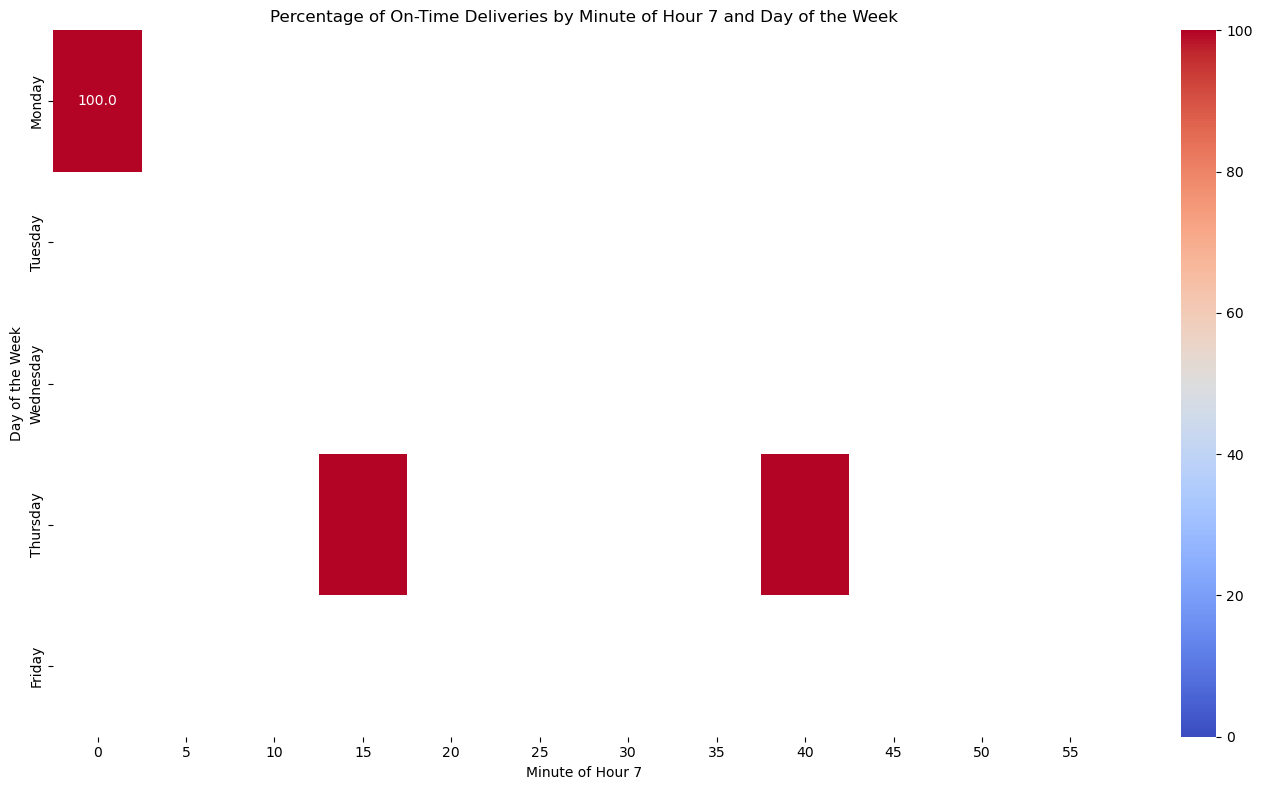

In [992]:
# Extract the day of the week from 'SCAN_DATETIME'
df_unique['SCAN_DAY_OF_WEEK'] = df_unique['SCAN_DATETIME'].dt.dayofweek
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_unique['DAY_OF_WEEK'] = df_unique['SCAN_DAY_OF_WEEK'].map(day_of_week_map)

# Create 'scan_minute_7' that only contains minute values if 'SCAN_HOUR' is 7
df_unique['scan_minute_7'] = df_unique.apply(
    lambda row: row['SCAN_DATETIME'].minute if row['SCAN_DATETIME'].hour == 7 else None, axis=1
)

# Drop rows where 'scan_minute_7' is None
df_unique = df_unique.dropna(subset=['scan_minute_7'])

# Exclude Saturday and Sunday
df_unique = df_unique[~df_unique['DAY_OF_WEEK'].isin(['Saturday', 'Sunday'])]

# Group by 'scan_minute_7' and 'DAY_OF_WEEK' and calculate the percentage of on-time deliveries
on_time_counts = df_unique.groupby(['scan_minute_7', 'DAY_OF_WEEK'])['ON_TIME'].sum()
total_counts = df_unique.groupby(['scan_minute_7', 'DAY_OF_WEEK']).size()
percentage_on_time = (on_time_counts / total_counts) * 100

# Create a DataFrame for plotting
heatmap_data = pd.DataFrame({
    'scan_minute_7': percentage_on_time.index.get_level_values('scan_minute_7'),
    'DAY_OF_WEEK': percentage_on_time.index.get_level_values('DAY_OF_WEEK'),
    'Percentage_On_Time': percentage_on_time.values
})

# Pivot the data for heatmap
heatmap_pivot = heatmap_data.pivot(index='DAY_OF_WEEK', columns='scan_minute_7', values='Percentage_On_Time')

# Ensure correct ordering of columns and index (days of the week)
heatmap_pivot = heatmap_pivot.reindex(
    columns=range(0, 60, 5),  # Assuming minute intervals of 5 minutes
    index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap='coolwarm', 
    cbar=True,
    vmin=0,
    vmax=100  
)

# Customize the plot
plt.xlabel('Minute of Hour 7')
plt.ylabel('Day of the Week')
plt.title('Percentage of On-Time Deliveries by Minute of Hour 7 and Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()

Not enough data to get a cutoff time with the minutes precision.

# Analyzing Weight

In [450]:
# Summary of weight
description = df_unique['WEIGHT'].describe()
print("\nDescriptive statistics for WEIGHT:")
print(description)


Descriptive statistics for WEIGHT:
count    1.219612e+06
mean     7.099298e+00
std      7.323983e+00
min      1.000000e-02
25%      1.100000e+00
50%      4.200000e+00
75%      1.154000e+01
max      4.630000e+01
Name: WEIGHT, dtype: float64


##### We see weight between 0.01 and 46.3 for our specific depots

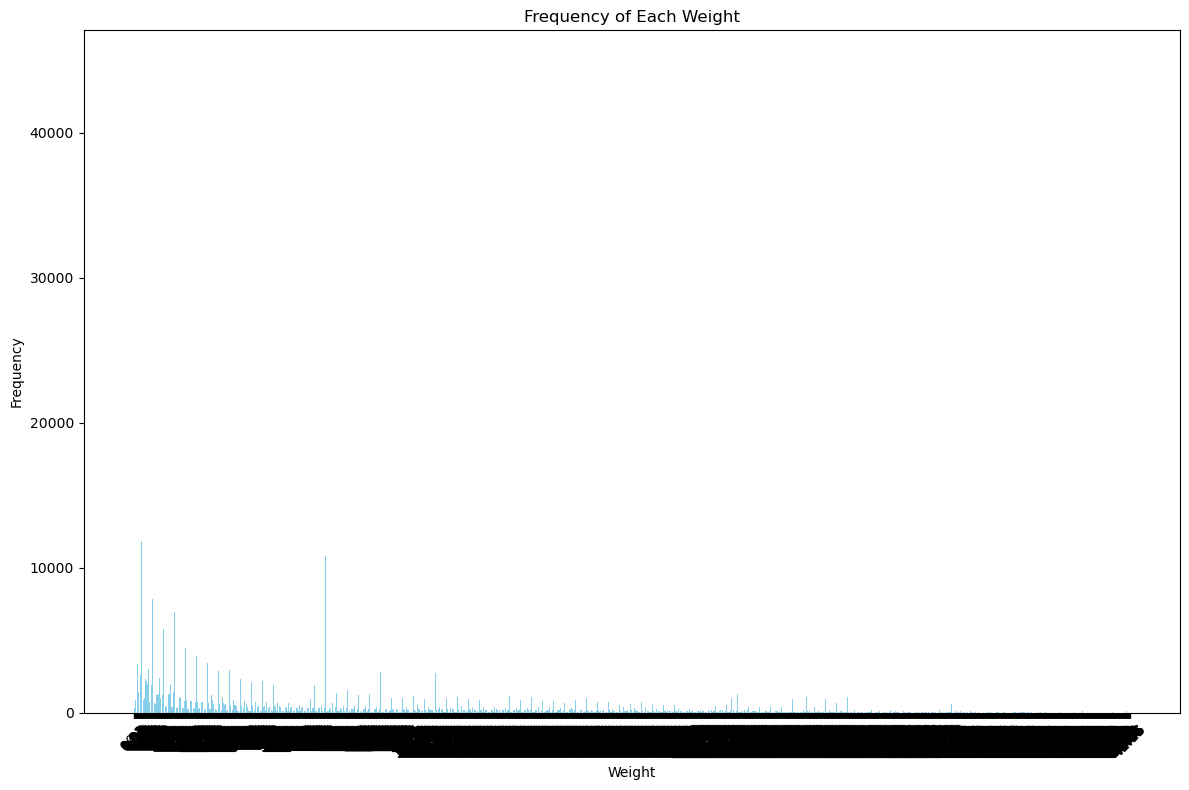

In [452]:
# Count frequencies of each weight
weight_counts = df_unique['WEIGHT'].value_counts().reset_index()
weight_counts.columns = ['WEIGHT', 'FREQUENCY']

# Sort by WEIGHT if needed
weight_counts = weight_counts.sort_values(by='WEIGHT')

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(weight_counts['WEIGHT'].astype(str), weight_counts['FREQUENCY'], color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Frequency of Each Weight')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

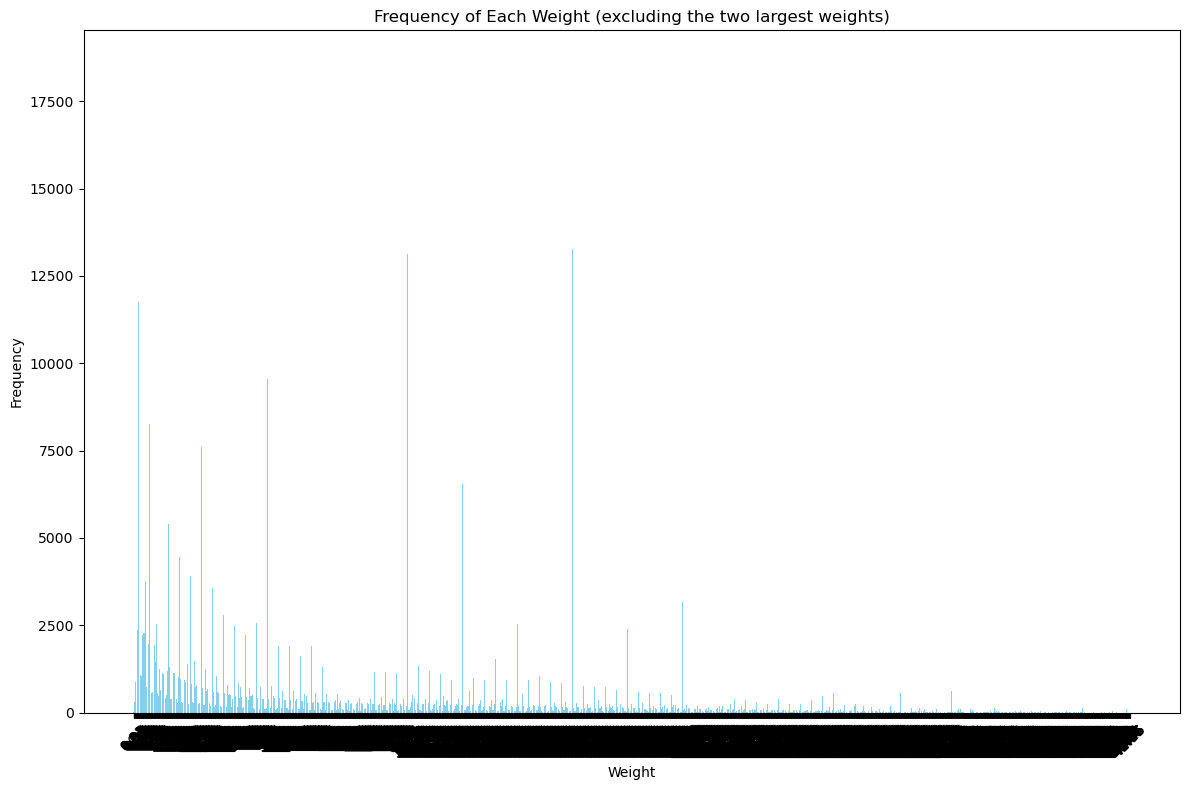

In [484]:
# Count frequencies of each weight
weight_counts = df_unique['WEIGHT'].value_counts().reset_index()
weight_counts.columns = ['WEIGHT', 'FREQUENCY']

# Drop the two largest weights
largest_weights = weight_counts['FREQUENCY'].nlargest(2).values
weight_counts = weight_counts[~weight_counts['FREQUENCY'].isin(largest_weights)]

# Sort by WEIGHT
weight_counts = weight_counts.sort_values(by='WEIGHT')

# Determine the maximum frequency for y-axis limit
max_frequency = weight_counts['FREQUENCY'].max()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(weight_counts['WEIGHT'].astype(str), weight_counts['FREQUENCY'], color='skyblue')

# Set y-axis limits to exclude the two largest frequencies
plt.ylim(0, max_frequency + 1)

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Frequency of Each Weight (excluding the two largest weights)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## It makes more sense to look at Percentages of true deliveries

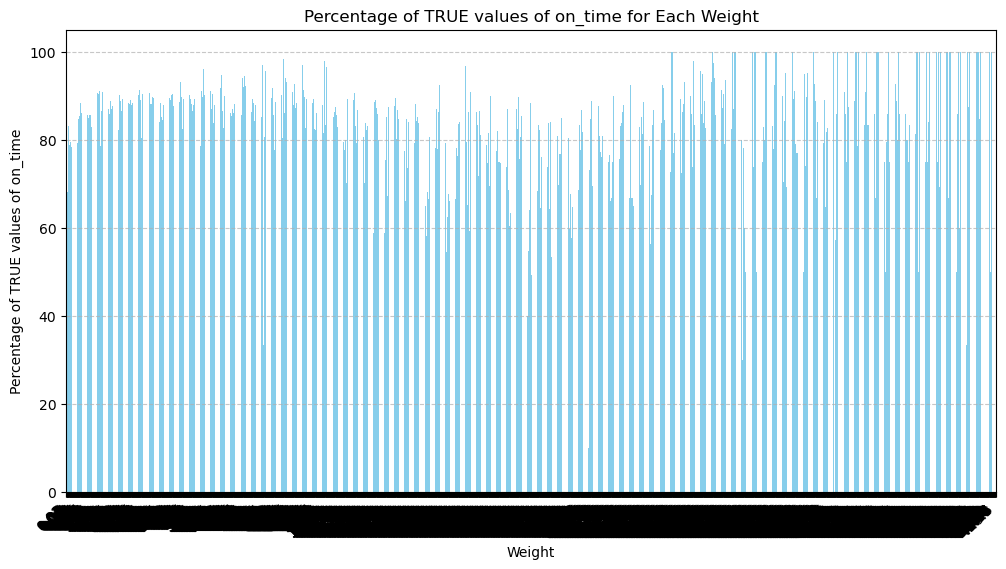

In [469]:
# Convert 'on_time' to integer (1 for True, 0 for False) for counting
df['on_time_int'] = df_unique['ON_TIME'].astype(int)

# Count the number of TRUE values for each weight
count_true = df_unique.groupby('WEIGHT')['on_time_int'].sum()

# Count the total number of records for each weight
total_count = df_unique.groupby('WEIGHT').size()

# Compute the percentage of TRUE values
percentage_true = (count_true / total_count) * 100

# Combine results into a DataFrame for easier analysis and visualization
result_df = pd.DataFrame({
    'Count_True': count_true,
    'Total_Count': total_count,
    'Percentage_True': percentage_true
}).reset_index()

# Plot using a bar chart
plt.figure(figsize=(12, 6))
percentage_true.plot(kind='bar', color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Percentage of TRUE values of on_time')
plt.title('Percentage of TRUE values of on_time for Each Weight')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [490]:
# Filter weights where the percentage of TRUE values is 0
zero_percentage_df = result_df[result_df['Percentage_True'] == 0]

# Calculate mean and median of weights with zero percentage
mean_weight = zero_percentage_df['WEIGHT'].mean()
median_weight = zero_percentage_df['WEIGHT'].median()

# Print the list of weights with zero percentage
print("Weights with zero percentage of TRUE values:")
print(zero_percentage_df[['WEIGHT', 'Percentage_True']])

# Print the mean and median
print(f"Mean weight of weights with zero percentage of TRUE values: {mean_weight:.2f}")
print(f"Median weight of weights with zero percentage of TRUE values: {median_weight:.2f}")


Weights with zero percentage of TRUE values:
      WEIGHT  Percentage_True
2696   26.99              0.0
2800   28.07              0.0
2849   28.57              0.0
2998   30.23              0.0
3217   33.24              0.0
3343   35.18              0.0
3468   37.21              0.0
3494   37.66              0.0
3497   37.72              0.0
3498   37.75              0.0
3529   38.34              0.0
3593   39.55              0.0
3594   39.56              0.0
3595   39.58              0.0
3599   39.69              0.0
3621   40.85              0.0
3623   41.65              0.0
3624   41.75              0.0
3626   42.35              0.0
3627   43.15              0.0
Mean weight of weights with zero percentage of TRUE values: 36.95
Median weight of weights with zero percentage of TRUE values: 38.05


In [494]:
# Filter weights where the percentage of TRUE values is 100
hundred_percentage_df = result_df[result_df['Percentage_True'] == 100]

# Calculate mean and median of weights with 100% percentage
mean_weight = hundred_percentage_df['WEIGHT'].mean()
median_weight = hundred_percentage_df['WEIGHT'].median()

# Print the list of weights with 100% percentage
print("Weights with 100% percentage of TRUE values:")
print(hundred_percentage_df[['WEIGHT', 'Percentage_True']])

# Print the mean and median
print(f"Mean weight of weights with 100% percentage of TRUE values: {mean_weight:.2f}")
print(f"Median weight of weights with 100% percentage of TRUE values: {median_weight:.2f}")

Weights with 100% percentage of TRUE values:
      WEIGHT  Percentage_True
858     8.59            100.0
2298   22.99            100.0
2320   23.21            100.0
2326   23.27            100.0
2328   23.29            100.0
...      ...              ...
3619   40.65            100.0
3620   40.80            100.0
3622   40.90            100.0
3625   41.95            100.0
3628   46.30            100.0

[447 rows x 2 columns]
Mean weight of weights with 100% percentage of TRUE values: 32.71
Median weight of weights with 100% percentage of TRUE values: 33.12


In [496]:
# Filter weights where the percentage of TRUE values is less than 50
less_than_50_df = result_df[result_df['Percentage_True'] < 50]

# Calculate mean, median, max, and min of weights with less than 50% true values
mean_weight = less_than_50_df['WEIGHT'].mean()
median_weight = less_than_50_df['WEIGHT'].median()
max_weight = less_than_50_df['WEIGHT'].max()
min_weight = less_than_50_df['WEIGHT'].min()

# Print the results
print(f"Mean weight of weights with less than 50% true values: {mean_weight:.2f}")
print(f"Median weight of weights with less than 50% true values: {median_weight:.2f}")
print(f"Max weight of weights with less than 50% true values: {max_weight:.2f}")
print(f"Min weight of weights with less than 50% true values: {min_weight:.2f}")

Mean weight of weights with less than 50% true values: 25.94
Median weight of weights with less than 50% true values: 22.59
Max weight of weights with less than 50% true values: 43.15
Min weight of weights with less than 50% true values: 0.03


In [500]:
# Filter weights where the percentage of TRUE values is more than 50
more_than_50_df = result_df[result_df['Percentage_True'] > 50]

# Calculate mean, median, max, and min of weights with more than 50% true values
mean_weight = more_than_50_df['WEIGHT'].mean()
median_weight = more_than_50_df['WEIGHT'].median()
max_weight = more_than_50_df['WEIGHT'].max()
min_weight = more_than_50_df['WEIGHT'].min()

# Print the results
print(f"Mean weight of weights with more than 50% true values: {mean_weight:.2f}")
print(f"Median weight of weights with more than 50% true values: {median_weight:.2f}")
print(f"Max weight of weights with more than 50% true values: {max_weight:.2f}")
print(f"Min weight of weights with more than 50% true values: {min_weight:.2f}")

Mean weight of weights with more than 50% true values: 18.10
Median weight of weights with more than 50% true values: 17.70
Max weight of weights with more than 50% true values: 46.30
Min weight of weights with more than 50% true values: 0.01


Weights associated with less than 50% true values have higher average (mean) and central (median) weights compared to those with more than 50% true values. This suggests that weights with lower on-time percentages are generally larger, on average.

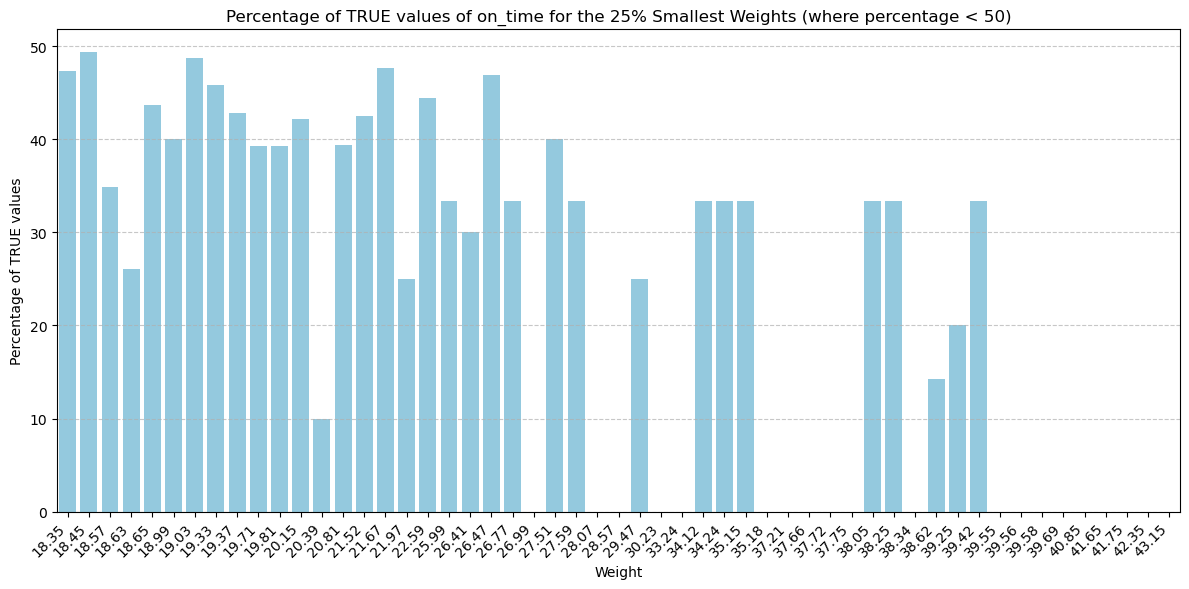

In [514]:
# Step 1: Filter weights where the percentage of TRUE values is less than 50
less_than_50_df = result_df[result_df['Percentage_True'] < 50]

# Step 2: Determine the 25% largest weights from the filtered DataFrame
bottom_25_percent_weights = less_than_50_df['WEIGHT'].quantile(0.25)

# Filter for these top 25% largest weights
bottom_weights_df = less_than_50_df[less_than_50_df['WEIGHT'] >= bottom_25_percent_weights]

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='WEIGHT', y='Percentage_True', data=bottom_weights_df, color='skyblue')

plt.xlabel('Weight')
plt.ylabel('Percentage of TRUE values')
plt.title('Percentage of TRUE values of on_time for the 25% Smallest Weights (where percentage < 50)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

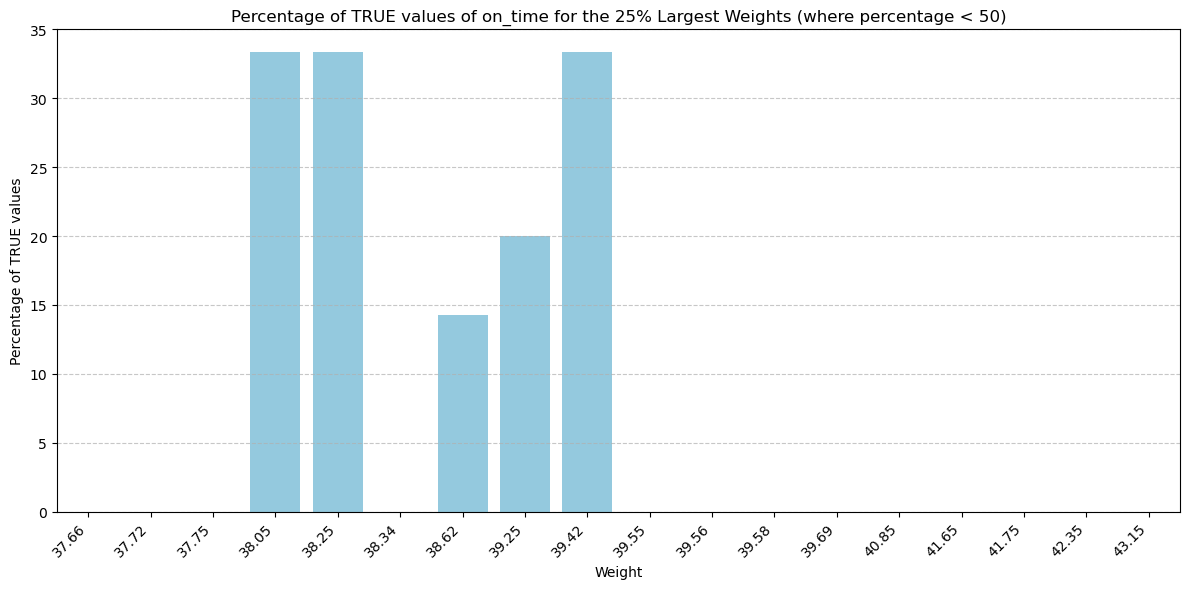

In [518]:
# Step 1: Filter weights where the percentage of TRUE values is less than 50
less_than_50_df = result_df[result_df['Percentage_True'] < 50]

# Step 2: Determine the 25% largest weights from the filtered DataFrame
top_25_percent_weights = less_than_50_df['WEIGHT'].quantile(0.75)

# Filter for these top 25% largest weights
top_weights_df = less_than_50_df[less_than_50_df['WEIGHT'] >= top_25_percent_weights]

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='WEIGHT', y='Percentage_True', data=top_weights_df, color='skyblue')

plt.xlabel('Weight')
plt.ylabel('Percentage of TRUE values')
plt.title('Percentage of TRUE values of on_time for the 25% Largest Weights (where percentage < 50)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# If we focus on smaller parcels (Parcels with weight <1)

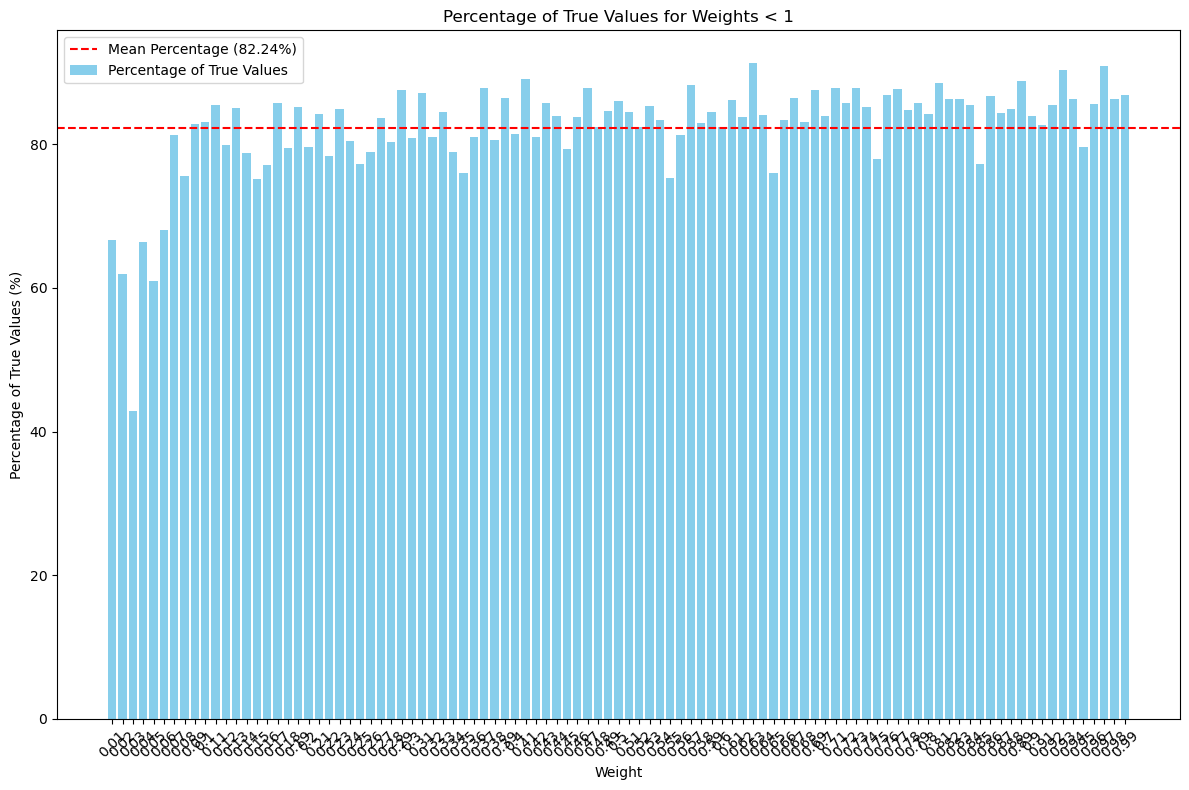

In [529]:
# Filter the DataFrame to show only rows where WEIGHT < 1
weights_less_than_one_df = result_df[result_df['WEIGHT'] < 1]

# Calculate the mean percentage of TRUE values in the filtered DataFrame
mean_percentage = weights_less_than_one_df['Percentage_True'].mean() if not weights_less_than_one_df.empty else 0

# Plot the data
plt.figure(figsize=(12, 8))
bars = plt.bar(weights_less_than_one_df['WEIGHT'].astype(str), weights_less_than_one_df['Percentage_True'], color='skyblue', label='Percentage of True Values')

plt.axhline(y=mean_percentage, color='r', linestyle='--', label=f'Mean Percentage ({mean_percentage:.2f}%)')
plt.xlabel('Weight')
plt.ylabel('Percentage of True Values (%)')
plt.title('Percentage of True Values for Weights < 1')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [531]:
# Calculate the mean percentage of TRUE values for all weights
mean_percentage_all_weights = result_df['Percentage_True'].mean()

print(f"Mean percentage of TRUE values for all weights: {mean_percentage_all_weights:.2f}%")

Mean percentage of TRUE values for all weights: 83.30%


So the mean percentage of true values for weights <1 is smaller than that of the entire dataset!

In [520]:
# Step 1: Filter rows where Percentage_True < 50
less_than_50_df = result_df[result_df['Percentage_True'] < 50]

# Step 2: Determine quartiles for WEIGHT
quartiles = less_than_50_df['WEIGHT'].quantile([0.25, 0.50, 0.75]).values
quartile_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Step 3: Assign quartile labels to each weight
def assign_quartile(weight, quartiles):
    if weight <= quartiles[0]:
        return 'Q1'
    elif weight <= quartiles[1]:
        return 'Q2'
    elif weight <= quartiles[2]:
        return 'Q3'
    else:
        return 'Q4'

less_than_50_df['Quartile'] = less_than_50_df['WEIGHT'].apply(lambda x: assign_quartile(x, quartiles))

# Step 4: Count the number of rows in each quartile
quartile_counts = less_than_50_df['Quartile'].value_counts().sort_index()

# Calculate total number of rows with Percentage_True < 50
total_count = len(less_than_50_df)

# Calculate the percentage of rows in each quartile
quartile_percentage = (quartile_counts / total_count) * 100

# Print the results
print("Number of rows with Percentage_True < 50 in each quartile:")
print(quartile_counts)
print("\nPercentage of rows with Percentage_True < 50 in each quartile:")
print(quartile_percentage)

Number of rows with Percentage_True < 50 in each quartile:
Quartile
Q1    18
Q2    18
Q3    17
Q4    18
Name: count, dtype: int64

Percentage of rows with Percentage_True < 50 in each quartile:
Quartile
Q1    25.352113
Q2    25.352113
Q3    23.943662
Q4    25.352113
Name: count, dtype: float64


/var/folders/6s/jtyjmwvn4wz6q7x39lwzwzsm0000gn/T/ipykernel_47187/4050824891.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_than_50_df['Quartile'] = less_than_50_df['WEIGHT'].apply(lambda x: assign_quartile(x, quartiles))


There is about 25% of true values in each quartile, no striking differences

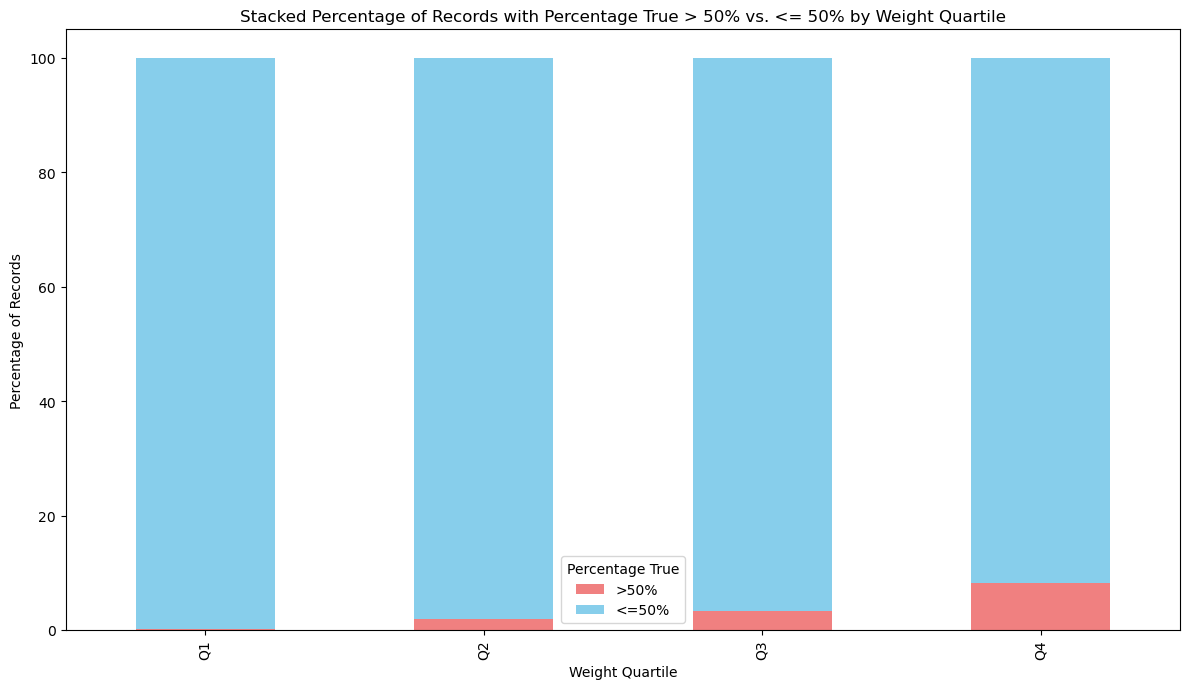

In [599]:
# Define quartiles for WEIGHT
weight_quartiles = pd.qcut(result_df['WEIGHT'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the DataFrame
result_df['Weight_Quartile'] = weight_quartiles

# Create a new column to indicate if Percentage_True > 50
result_df['Above_50'] = result_df['Percentage_True'] > 50

# Calculate the number of records for each category (Above 50 and 50 or Below) within each quartile
quartile_counts = result_df.groupby(['Weight_Quartile', 'Above_50']).size().unstack(fill_value=0).reset_index()
quartile_totals = result_df.groupby('Weight_Quartile').size().reset_index(name='Total')

# Merge counts with totals for percentage calculation
quartile_summary = pd.merge(quartile_counts, quartile_totals, on='Weight_Quartile')
quartile_summary['Percentage_Above_50'] = (quartile_summary[True] / quartile_summary['Total']) * 100
quartile_summary['Percentage_50_or_Below'] = (quartile_summary[False] / quartile_summary['Total']) * 100

# Prepare data for plotting
plot_data = pd.melt(quartile_summary, id_vars=['Weight_Quartile'], value_vars=['Percentage_Above_50', 'Percentage_50_or_Below'],
                    var_name='Category', value_name='Percentage')

# Pivot the data for stacked bar plot
plot_pivot = plot_data.pivot(index='Weight_Quartile', columns='Category', values='Percentage').fillna(0)
# Plot the data
ax = plot_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightcoral', 'skyblue'])
# Customize plot
plt.xlabel('Weight Quartile')
plt.ylabel('Percentage of Records')
plt.title('Stacked Percentage of Records with Percentage True > 50% vs. <= 50% by Weight Quartile')
plt.legend(title='Percentage True', labels=['>50%', '<=50%'])
plt.tight_layout()
# Show the plot
plt.show()

# Hypothesis: 
Large weights are more likely to be delivered on time. 
#### Why? 
Because they might be for companies and not individuals. Can we confirm this? 

### However
The quartile analysis seems to prove the opposite

# Per depot weight analysis

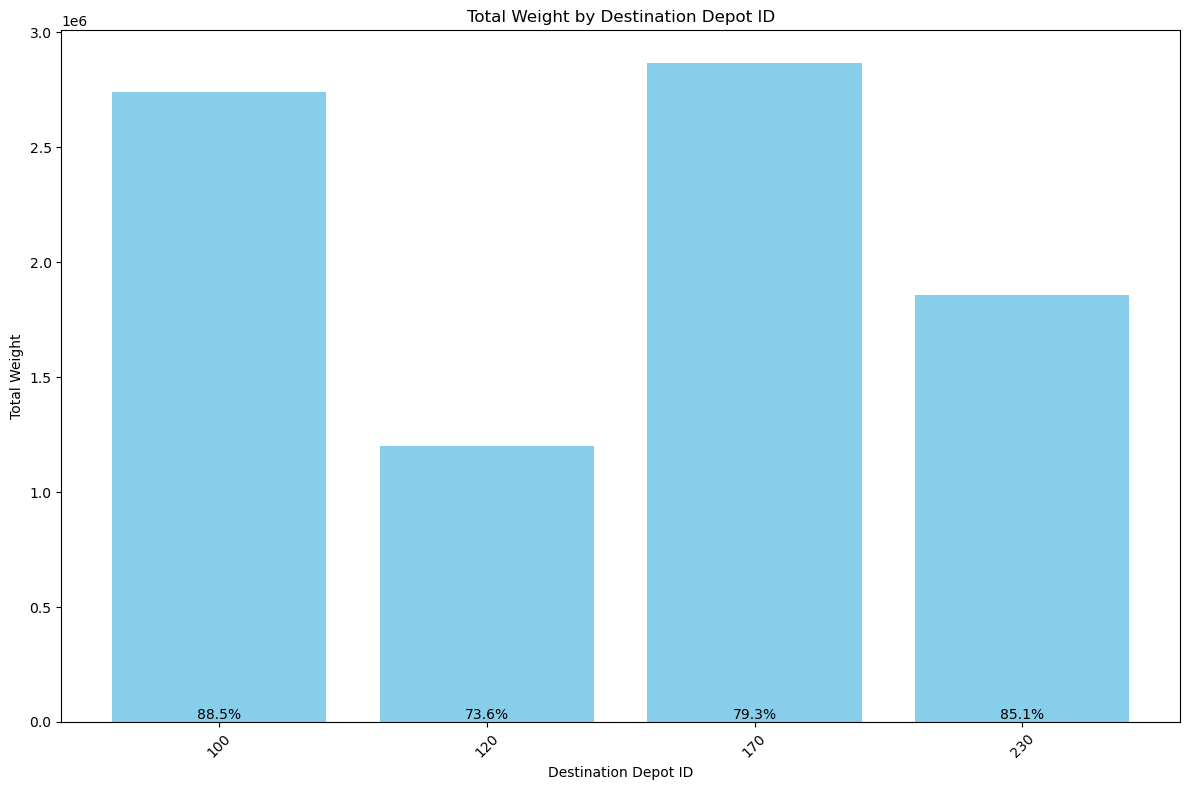

In [551]:
# Calculate the total volume for each DESTINATION_DEPOT_ID
total_weight_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['WEIGHT'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(total_volume_by_depot['DESTINATION_DEPOT_ID'].astype(str), total_weight_by_depot['WEIGHT'], color='skyblue', label='Total Weight')
# Add percentage labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('Destination Depot ID')
plt.ylabel('Total Weight')
plt.title('Total Weight by Destination Depot ID')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

In [558]:
# Calculate the mean volume for each DESTINATION_DEPOT_ID
mean_weight_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['WEIGHT'].mean().reset_index()

# Print the mean volume for each DESTINATION_DEPOT_ID
print("Mean weight for each DESTINATION_DEPOT_ID:")
print(mean_weight_by_depot)

Mean weight for each DESTINATION_DEPOT_ID:
   DESTINATION_DEPOT_ID    WEIGHT
0                   100  6.638704
1                   120  6.483037
2                   170  8.373197
3                   230  6.628695


Depot 100 has a much larger weight summed but the mean of all weights is similar to that of 120. Only depot 170 seems to have a higher mean.

/var/folders/6s/jtyjmwvn4wz6q7x39lwzwzsm0000gn/T/ipykernel_47187/1052172482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['on_time_int'] = df_unique['ON_TIME'].astype(int)


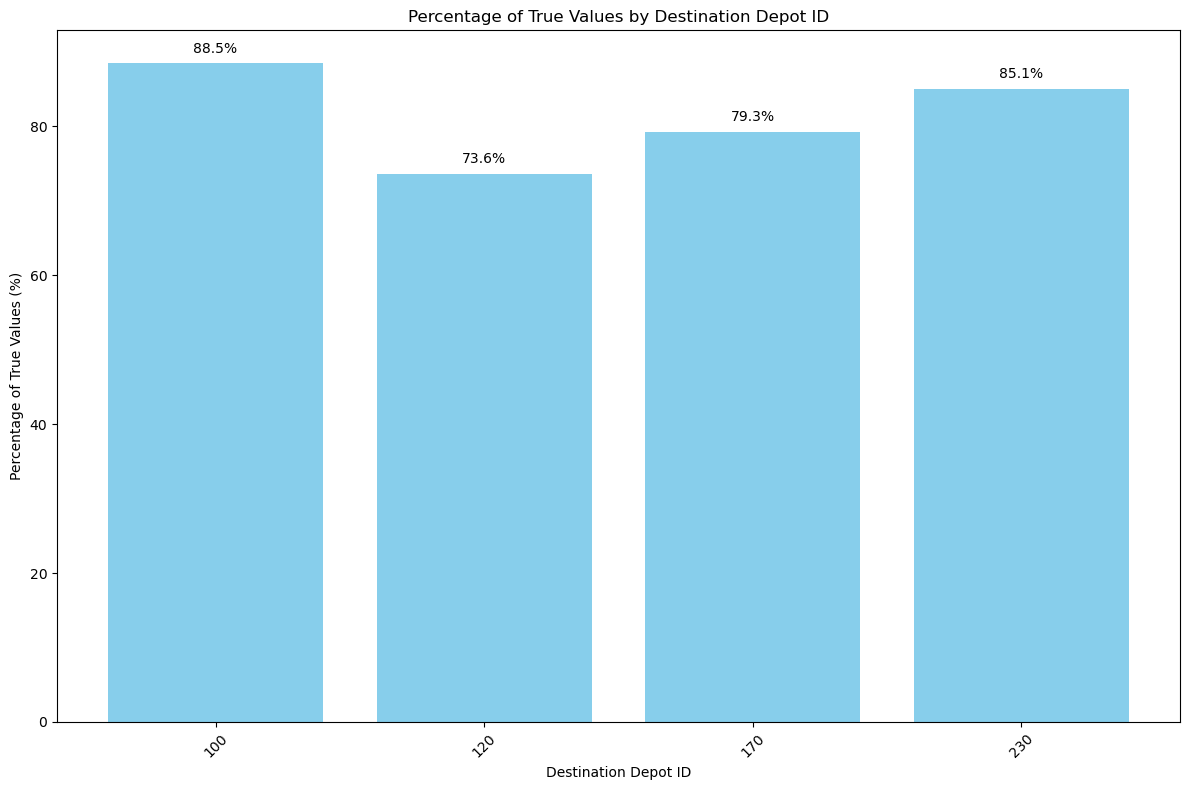

In [549]:
# Ensure 'on_time' is an integer (1 for True, 0 for False)
df_unique['on_time_int'] = df_unique['ON_TIME'].astype(int)

# Count the number of TRUE values for each depot
count_true_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['on_time_int'].sum()

# Count the total number of records for each depot
total_count_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID').size()

# Compute the percentage of TRUE values for each depot
percentage_true_by_depot = (count_true_by_depot / total_count_by_depot) * 100

# Combine results into a DataFrame for easier analysis
result_df_depot = pd.DataFrame({
    'Count_True': count_true_by_depot,
    'Total_Count': total_count_by_depot,
    'Percentage_True': percentage_true_by_depot
}).reset_index()
# Plot the percentage of TRUE values for each depot
plt.figure(figsize=(12, 8))
bars = plt.bar(result_df_depot['DESTINATION_DEPOT_ID'].astype(str), result_df_depot['Percentage_True'], color='skyblue')

# Add percentage labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Destination Depot ID')
plt.ylabel('Percentage of True Values (%)')
plt.title('Percentage of True Values by Destination Depot ID')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

Depot 100 has the heighest weights and the largest on time deliveries. This strengthens our claim but depot 170 has the second largest weights YET the third on time deliveries.

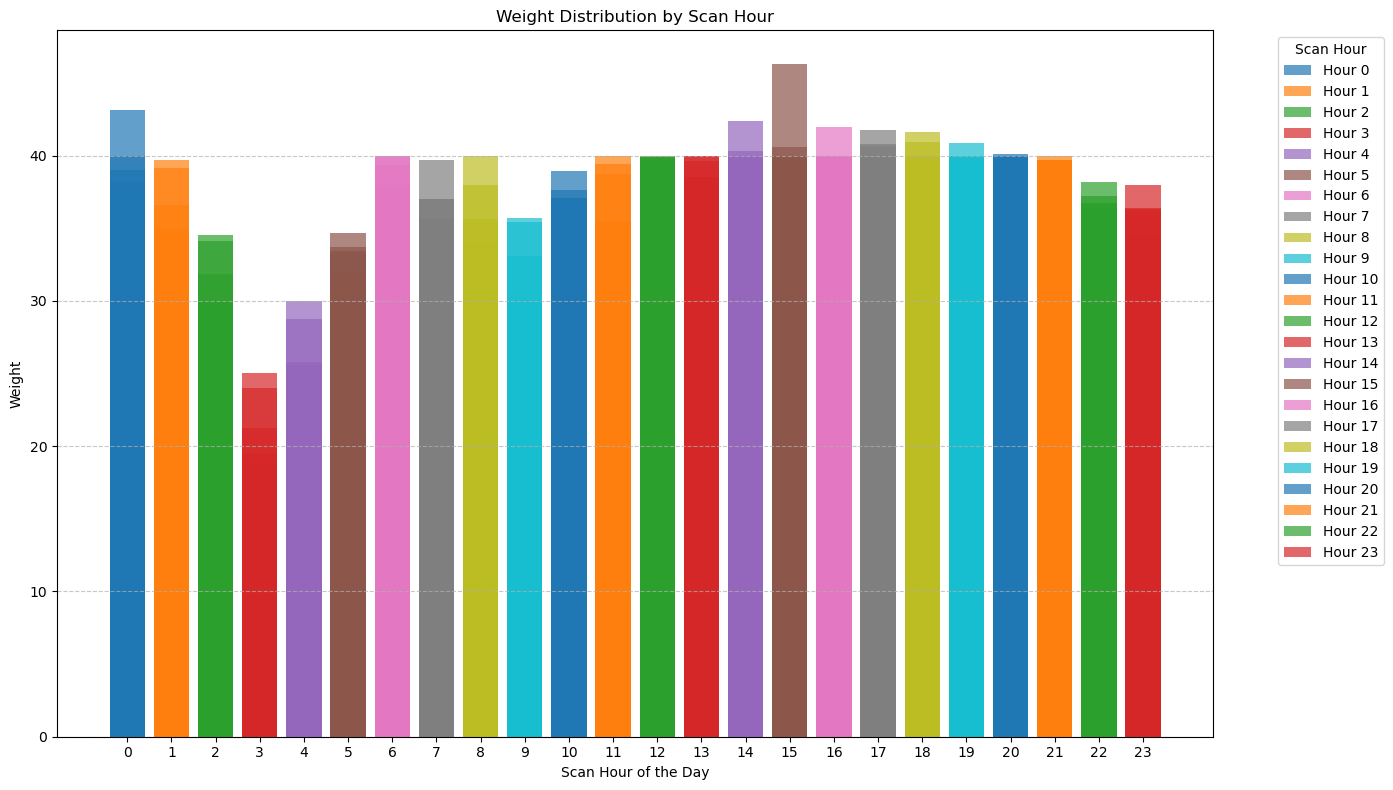

In [1037]:

# Group by 'SCAN_HOUR' and collect all weights for plotting
weights_by_hour = df_unique.groupby('SCAN_HOUR')['WEIGHT'].apply(list).reset_index()

# Expand the lists into separate rows
expanded_weights = weights_by_hour.explode('WEIGHT')

# Plotting
plt.figure(figsize=(14, 8))
for hour in expanded_weights['SCAN_HOUR'].unique():
    hour_data = expanded_weights[expanded_weights['SCAN_HOUR'] == hour]
    plt.bar([hour] * len(hour_data), hour_data['WEIGHT'], label=f'Hour {hour}', alpha=0.7)

# Customize the plot
plt.xlabel('Scan Hour of the Day')
plt.ylabel('Weight')
plt.title('Weight Distribution by Scan Hour')
plt.xticks(range(24))  # Set x-ticks for each hour of the day
plt.legend(title='Scan Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [1038]:
# Group by 'SCAN_HOUR' and collect all weights
weights_by_hour = df_unique.groupby('SCAN_HOUR')['WEIGHT'].apply(list).reset_index()

# Expand the lists into separate rows
expanded_weights = weights_by_hour.explode('WEIGHT')

# Create a summary table
summary_table = weights_by_hour.copy()
summary_table['WEIGHT_COUNT'] = summary_table['WEIGHT'].apply(len)
summary_table['WEIGHT_SUM'] = summary_table['WEIGHT'].apply(sum)
summary_table['WEIGHT_MEAN'] = summary_table['WEIGHT'].apply(lambda x: sum(x) / len(x) if x else 0)

# Display the summary table
print(summary_table)

    SCAN_HOUR                                             WEIGHT  \
0           0  [0.35, 25.0, 0.4, 24.0, 6.55, 16.5, 25.2, 25.2...   
1           1  [2.5, 0.5, 5.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   
2           2  [1.45, 0.61, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0...   
3           3  [0.1, 2.3, 21.26, 2.33, 2.11, 2.17, 0.75, 1.91...   
4           4  [2.43, 20.64, 6.94, 0.78, 5.35, 21.3, 21.3, 1....   
5           5  [0.5, 1.0, 0.3, 6.0, 6.0, 6.0, 6.0, 1.96, 2.24...   
6           6  [30.0, 1.0, 8.35, 5.25, 1.6, 0.5, 1.0, 2.0, 0....   
7           7  [0.11, 0.11, 0.1, 0.11, 20.07, 0.11, 0.1, 0.1,...   
8           8  [3.46, 0.28, 0.6, 4.56, 3.85, 0.28, 4.55, 2.2,...   
9           9  [0.5, 8.55, 0.1, 0.16, 0.1, 0.16, 0.16, 1.0, 0...   
10         10  [37.08, 37.02, 37.1, 0.6, 0.1, 23.46, 10.25, 0...   
11         11  [4.84, 6.62, 4.36, 2.0, 11.68, 5.0, 5.0, 5.0, ...   
12         12  [1.0, 0.9, 10.66, 14.15, 16.1, 11.8, 5.32, 6.7...   
13         13  [0.5, 2.46, 0.88, 17.05, 15.15, 3

There isn't a particular trend, although we do see that at 15 we have the heaviest parcels. I wanted to focus on hours between 9 and 13 to see a correlation between the lower weight parcels and the parcels that have a lower probability of arriving on time and even though we do see that the weights in that section are lower than the mean, it is not significant.

# Analyzing Volume

In [537]:
# Filter out NaN and zero volumes
filtered_df = df_unique[(df_unique['VOLUME'].notna()) & (df_unique['VOLUME'] > 0)]

# Convert 'on_time' to integer (1 for True, 0 for False) for counting
df_unique['on_time_int'] = df_unique['ON_TIME'].astype(int)

# Count the number of TRUE values for each volume
volume_count_true = df_unique.groupby('VOLUME')['on_time_int'].sum()

# Count the total number of records for each volume
volume_total_count = df_unique.groupby('VOLUME').size()

# Compute the percentage of TRUE values
volume_percentage_true = (volume_count_true / volume_total_count) * 100

# Combine results into a DataFrame for easier analysis and visualization
volume_result_df = pd.DataFrame({
    'Count_True': volume_count_true,
    'Total_Count': volume_total_count,
    'Percentage_True': volume_percentage_true
}).reset_index()

/var/folders/6s/jtyjmwvn4wz6q7x39lwzwzsm0000gn/T/ipykernel_47187/4217623332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['on_time_int'] = df_unique['ON_TIME'].astype(int)


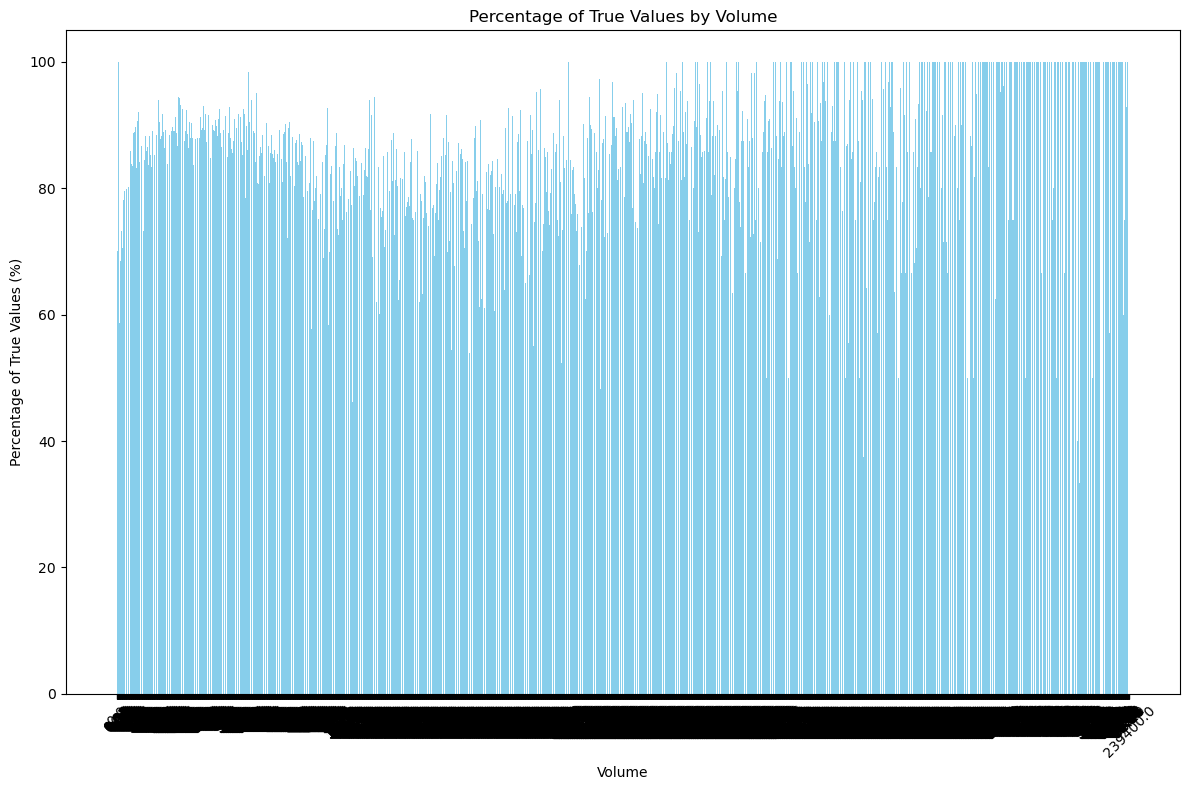

In [539]:
# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(volume_result_df['VOLUME'].astype(str), volume_result_df['Percentage_True'], color='skyblue', label='Percentage of True Values')
plt.xlabel('Volume')
plt.ylabel('Percentage of True Values (%)')
plt.title('Percentage of True Values by Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

## Per depot volume analysis

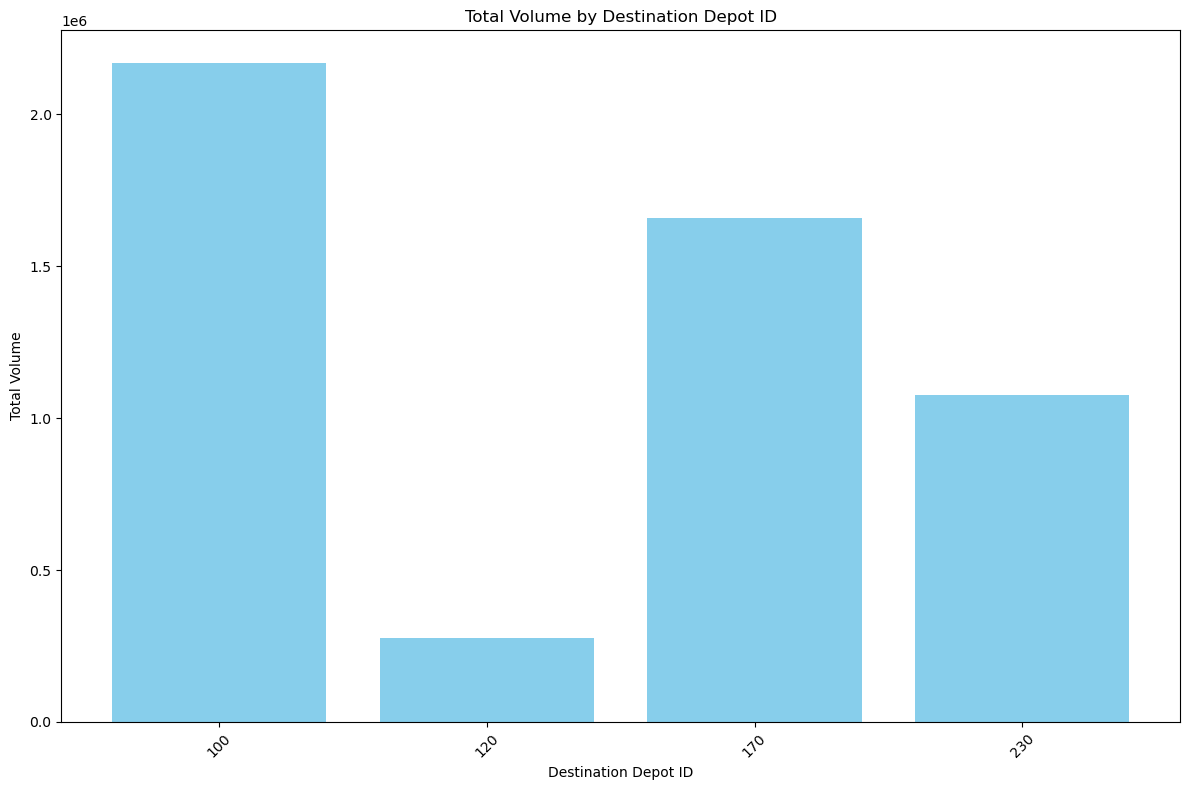

In [542]:
# Calculate the total volume for each DESTINATION_DEPOT_ID
total_volume_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['VOLUME'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(total_volume_by_depot['DESTINATION_DEPOT_ID'].astype(str), total_volume_by_depot['VOLUME'], color='skyblue', label='Total Volume')
plt.xlabel('Destination Depot ID')
plt.ylabel('Total Volume')
plt.title('Total Volume by Destination Depot ID')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

In [554]:
# Calculate the mean volume for each DESTINATION_DEPOT_ID
mean_volume_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['VOLUME'].mean()

# Print the mean volume for each DESTINATION_DEPOT_ID
print("Mean volume for each DESTINATION_DEPOT_ID:")
print(mean_volume_by_depot)

Mean volume for each DESTINATION_DEPOT_ID:
DESTINATION_DEPOT_ID
100     8.223577
120    46.386874
170     8.959739
230     7.972049
Name: VOLUME, dtype: float64


Depot 120 has the lowest sum of volumes but the highest mean, does it contain an outlier?

In [561]:
# Find the row with the highest volume
highest_volume_row = df_unique.loc[df_unique['VOLUME'].idxmax()]

# Print the result
print("Row with the highest volume:")
print(highest_volume_row)

Row with the highest volume:
UNITNO                                      56181853493
SCAN_DATETIME                       2024-06-27 17:42:14
EVENT_CODE                                            0
EVENT_REASON                                          0
WEIGHT                                             39.9
VOLUME                                         239400.0
STACKABLE                                         False
SMALL                                             False
HAZARDOUS                                         False
BELT                                               True
DESTINATION_ZIPCODE                               14548
EVENT_TYPE                                   FIRST_SCAN
RAW_DESTINATION_DEPOT_ID                         DE 122
RAW_SCAN_DEPOT_ID                                DE 560
DESTINATION_DEPOT_ID                                120
SCAN_DEPOT_ID                                       560
DESTINATION_SCAN_DATETIME    2024-06-28 06:10:31.762000
FIRST_SCAN_DATETIME

For the most voluminous parcel, depot 120 is the destination_depot_id. So depot 120 does contain an outlier. If we exclude it, what would we get?

In [567]:
# Find the highest volume
highest_volume = df_unique['VOLUME'].max()

# Exclude rows with the highest volume
df_excluding_highest_volume = df_unique[df_unique['VOLUME'] != highest_volume]

# Calculate the mean volume for each DESTINATION_DEPOT_ID excluding the highest volume
mean_volume_by_depot_excluding_highest = df_excluding_highest_volume.groupby('DESTINATION_DEPOT_ID')['VOLUME'].mean()

# Print the mean volume for each DESTINATION_DEPOT_ID excluding the highest volume
print("Mean volume for each DESTINATION_DEPOT_ID (excluding the highest volume):")
print(mean_volume_by_depot_excluding_highest)


Mean volume for each DESTINATION_DEPOT_ID (excluding the highest volume):
DESTINATION_DEPOT_ID
100    8.223577
120    6.394625
170    8.959739
230    7.972049
Name: VOLUME, dtype: float64


If we exclude the highest volume, means becomes a lot closer. Even more, the mean of 120 is the smallest.

# We now look at the parcels with true percentages <50%

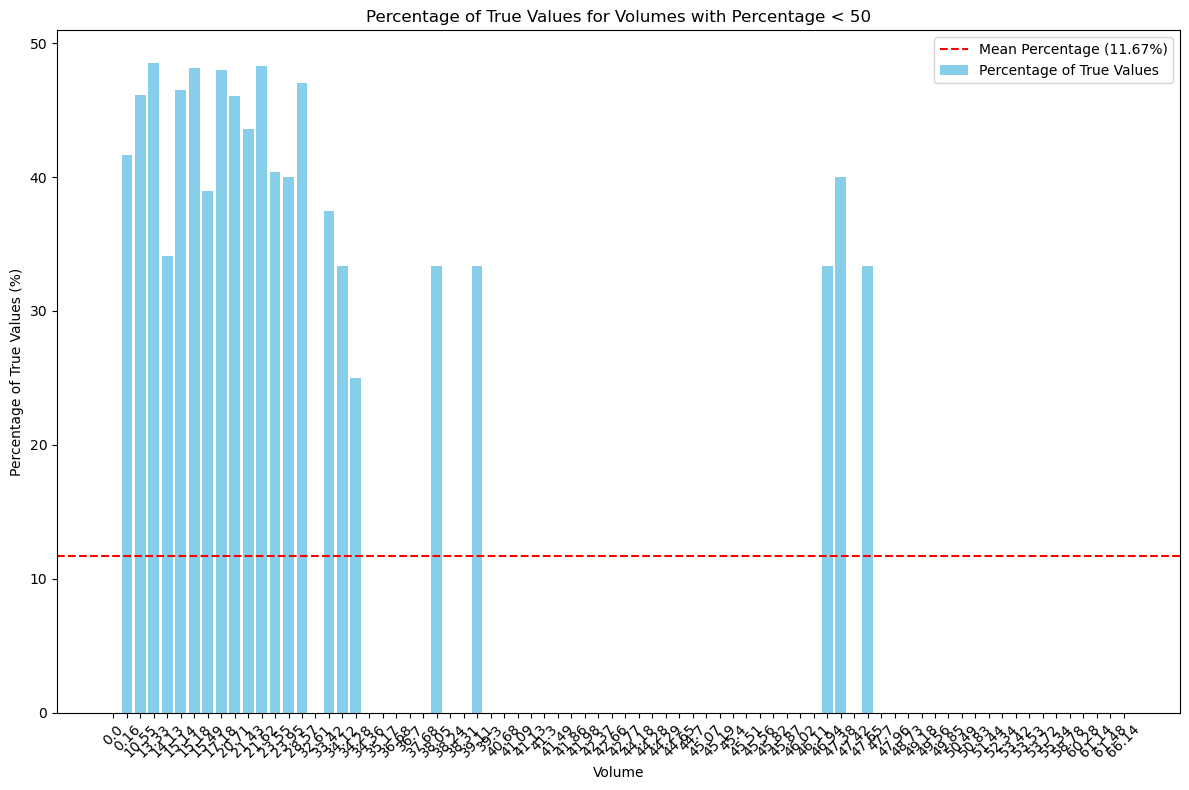

In [570]:
# Filter the DataFrame to show only rows where Percentage_True < 50
volume_worsehalf_result_df = volume_result_df[volume_result_df['Percentage_True'] < 50]

# Calculate the mean percentage of TRUE values in the filtered DataFrame
mean_volume_percentage = volume_worsehalf_result_df['Percentage_True'].mean()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(volume_worsehalf_result_df['VOLUME'].astype(str), volume_worsehalf_result_df['Percentage_True'], color='skyblue', label='Percentage of True Values')
plt.axhline(y=mean_volume_percentage, color='r', linestyle='--', label=f'Mean Percentage ({mean_volume_percentage:.2f}%)')
plt.xlabel('Volume')
plt.ylabel('Percentage of True Values (%)')
plt.title('Percentage of True Values for Volumes with Percentage < 50')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

We see that parcels are more likely to have a percentage of true on time delivery <50 if they have smaller volumes.

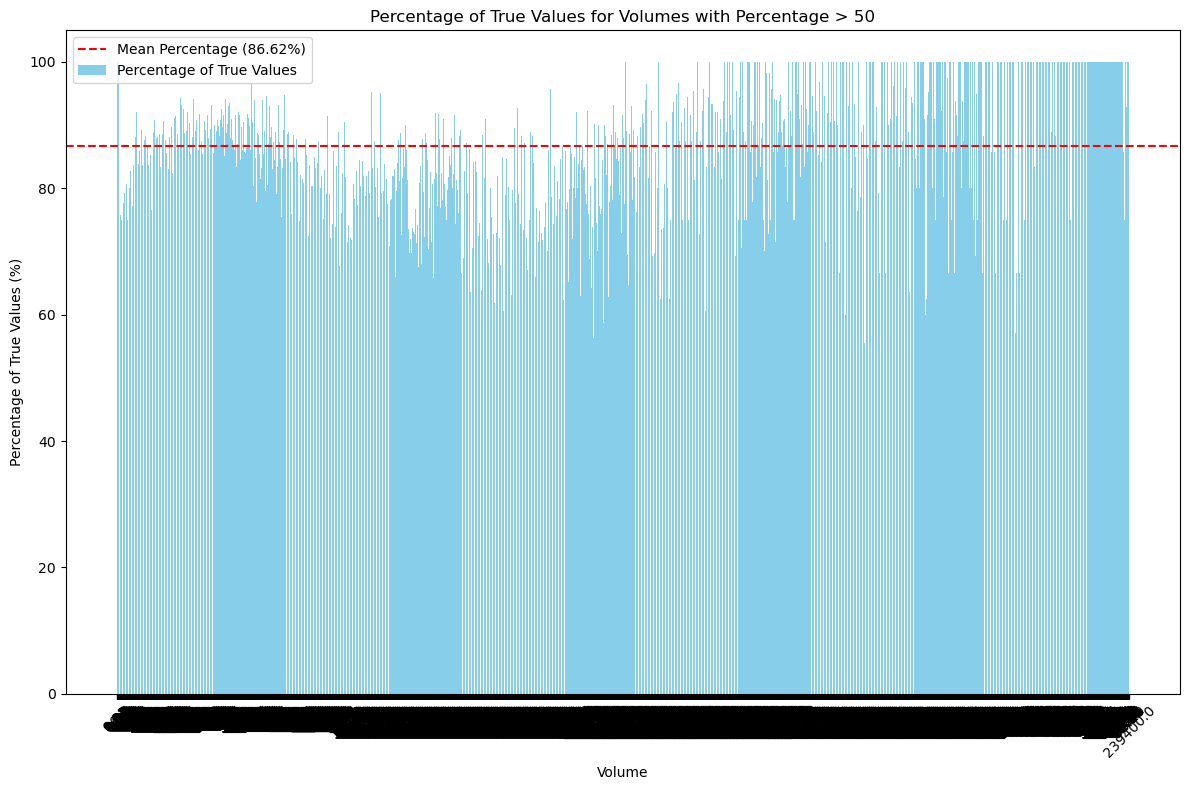

In [573]:
# Filter the DataFrame to show only rows where Percentage_True > 50
volume_worsehalf_result_df = volume_result_df[volume_result_df['Percentage_True'] > 50]

# Calculate the mean percentage of TRUE values in the filtered DataFrame
mean_volume_percentage = volume_worsehalf_result_df['Percentage_True'].mean()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(volume_worsehalf_result_df['VOLUME'].astype(str), volume_worsehalf_result_df['Percentage_True'], color='skyblue', label='Percentage of True Values')
plt.axhline(y=mean_volume_percentage, color='r', linestyle='--', label=f'Mean Percentage ({mean_volume_percentage:.2f}%)')
plt.xlabel('Volume')
plt.ylabel('Percentage of True Values (%)')
plt.title('Percentage of True Values for Volumes with Percentage > 50')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

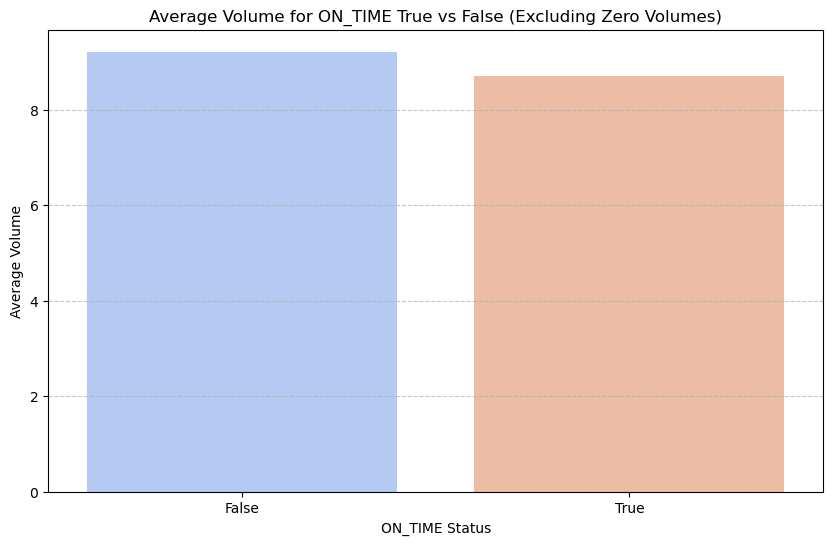

In [666]:
# Ensure 'ON_TIME' column is boolean
df_unique['ON_TIME'] = df_unique['ON_TIME'].astype(bool)

# Exclude volumes of 0
df_nonzero = df_unique[df_unique['VOLUME'] > 0]

# Recalculate average volume for each ON_TIME status after excluding zero volumes
average_volume_stats_nonzero = df_nonzero.groupby('ON_TIME')['VOLUME'].mean().reset_index()
average_volume_stats_nonzero['ON_TIME'] = average_volume_stats_nonzero['ON_TIME'].map({True: 'True', False: 'False'})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ON_TIME', y='VOLUME', data=average_volume_stats_nonzero, palette='coolwarm')

# Customizing the plot
plt.title('Average Volume for ON_TIME True vs False (Excluding Zero Volumes)')
plt.xlabel('ON_TIME Status')
plt.ylabel('Average Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Here we get a different results, meaning that average volumes are smaller for on time deliveries.

If we exclude the largest volume, does that change the graph?

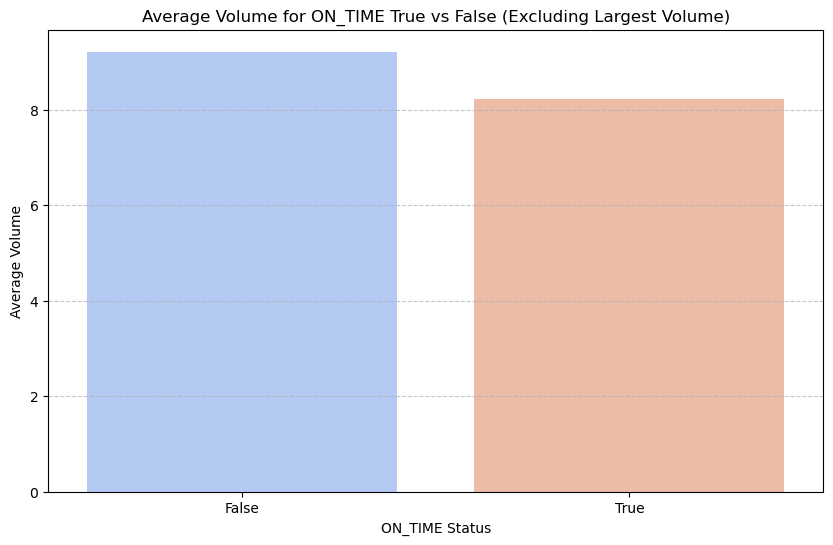

In [668]:
# Ensure 'ON_TIME' column is boolean
df_unique['ON_TIME'] = df_unique['ON_TIME'].astype(bool)

# Find the largest volume
largest_volume = df_unique['VOLUME'].max()

# Exclude the largest volume
df_excluded = df_unique[df_unique['VOLUME'] != largest_volume]

# Recalculate average volume for each ON_TIME status after exclusion
average_volume_stats_excluded = df_excluded.groupby('ON_TIME')['VOLUME'].mean().reset_index()
average_volume_stats_excluded['ON_TIME'] = average_volume_stats_excluded['ON_TIME'].map({True: 'True', False: 'False'})

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ON_TIME', y='VOLUME', data=average_volume_stats_excluded, palette='coolwarm')

# Customizing the plot
plt.title('Average Volume for ON_TIME True vs False (Excluding Largest Volume)')
plt.xlabel('ON_TIME Status')
plt.ylabel('Average Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The average volume for on_time deliveries decreases even further. 

## Are volume and weight correlated?

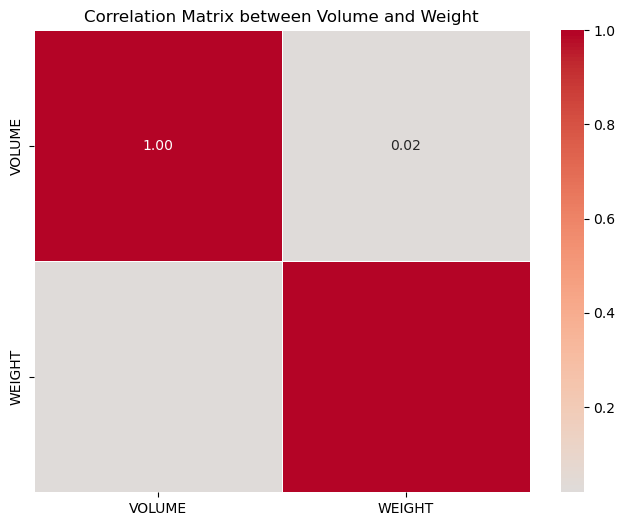

In [675]:
# Ensure 'VOLUME' and 'WEIGHT' are numeric
df_unique['VOLUME'] = pd.to_numeric(df_unique['VOLUME'], errors='coerce')
df_unique['WEIGHT'] = pd.to_numeric(df_unique['WEIGHT'], errors='coerce')

# Drop rows with NaN values to avoid issues in correlation calculation
df_clean = df_unique.dropna(subset=['VOLUME', 'WEIGHT'])

# Compute the correlation matrix
correlation_matrix = df_clean[['VOLUME', 'WEIGHT']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Volume and Weight')
plt.show()

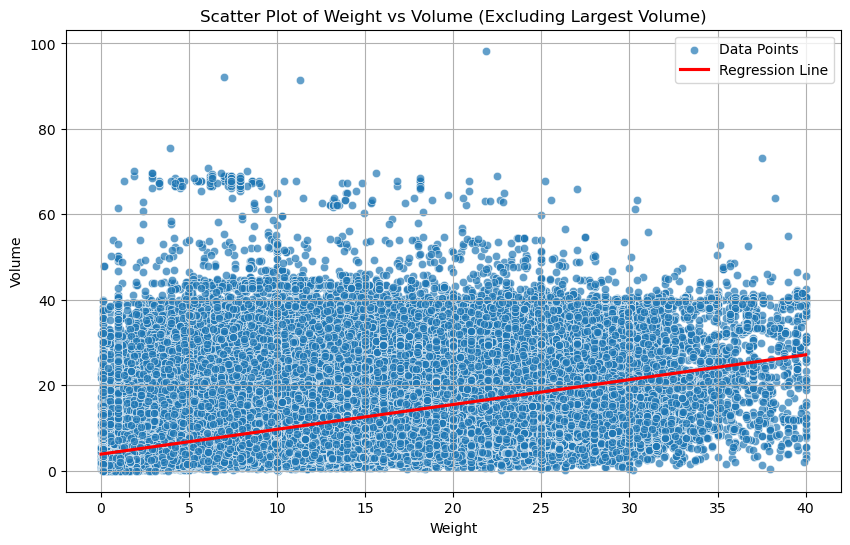

In [684]:
# Find the maximum volume
max_volume = df_clean['VOLUME'].max()

# Exclude the rows with the maximum volume
df_clean_excluded = df_clean[df_clean['VOLUME'] != max_volume]


# Plotting with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WEIGHT', y='VOLUME', data=df_clean_excluded, alpha=0.7, label='Data Points')
sns.regplot(x='WEIGHT', y='VOLUME', data=df_clean_excluded, scatter=False, color='red', label='Regression Line')
plt.title('Scatter Plot of Weight vs Volume (Excluding Largest Volume)')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

We can see a weak linear relationship such that when weight increases, volume increases too which makes sense. This will lead us to believe that they have the same directional effect on on_time criteria.

# Tires? Have missing volumes, and a fixed rounded weight

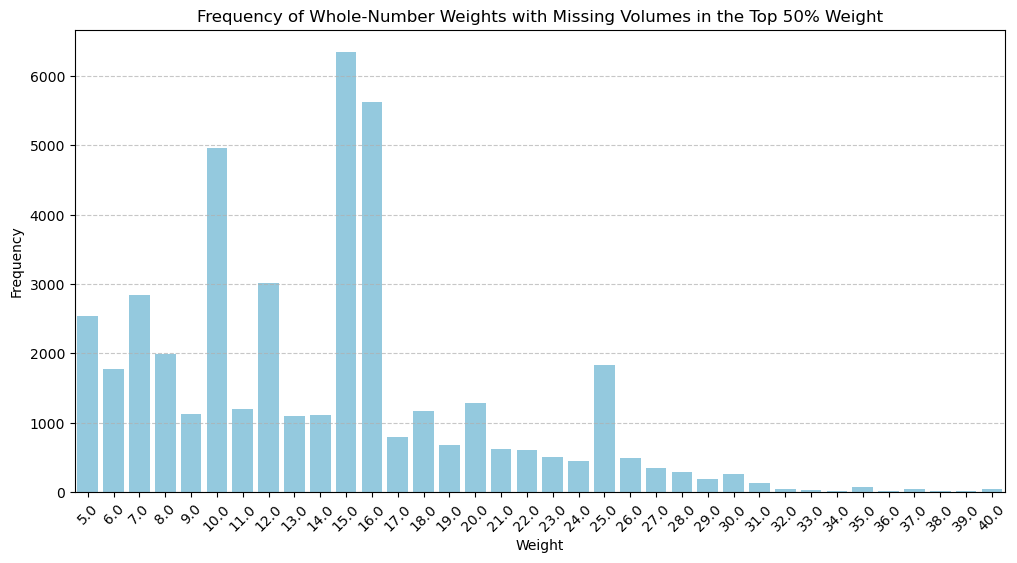

In [724]:

# Step 1: Calculate the 50th percentile (median) weight
weight_median = df_unique['WEIGHT'].median()

# Step 2: Filter rows with missing volumes
missing_volume_df = df_unique[df_unique['VOLUME'].isna()]

# Step 3: Filter rows with weight in the top 50% and with whole-number weights
top_50_weight_missing_volume = missing_volume_df[
    (missing_volume_df['WEIGHT'] >= weight_median) &
    (missing_volume_df['WEIGHT'] % 1 == 0)  # Filter only whole numbers
]

# Step 4: Count the frequency of each weight
weight_counts = top_50_weight_missing_volume['WEIGHT'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=weight_counts.index, y=weight_counts.values, color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Frequency of Whole-Number Weights with Missing Volumes in the Top 50% Weight')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Research gives us these results
Standard passenger car tire: Approximately 20 to 30 pounds (9 to 14 kg).
Standard SUV or light truck tire: Approximately 30 to 50 pounds (14 to 23 kg).
Medium-duty truck tire: Approximately 50 to 75 pounds (23 to 34 kg).
Heavy-duty truck tire: Approximately 75 to 120 pounds (34 to 54 kg).
Standard motorcycle tire: Approximately 10 to 20 pounds (4.5 to 9 kg).

We can then assume that those with weight 15.0 are the tires.

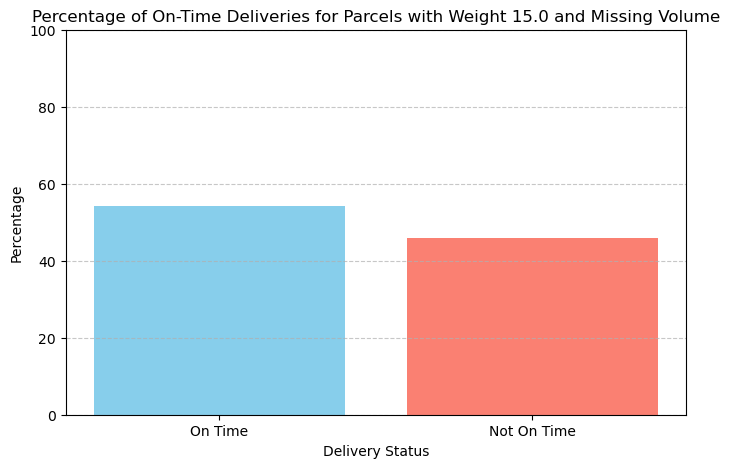

In [730]:
# Filter for parcels with weight exactly 15.0 and missing volume
df_filtered = df_unique[(df_unique['WEIGHT'] == 15.0) & (df_unique['VOLUME'].isna())]

# Calculate the percentage of ON_TIME
total_filtered = len(df_filtered)
if total_filtered > 0:
    on_time_percentage = (df_filtered['ON_TIME'].sum() / total_filtered) * 100
else:
    on_time_percentage = 0  # Avoid division by zero if there are no matching rows

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Status': ['On Time', 'Not On Time'],
    'Percentage': [on_time_percentage, 100 - on_time_percentage]
})

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(plot_data['Status'], plot_data['Percentage'], color=['skyblue', 'salmon'])
plt.xlabel('Delivery Status')
plt.ylabel('Percentage')
plt.title('Percentage of On-Time Deliveries for Parcels with Weight 15.0 and Missing Volume')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

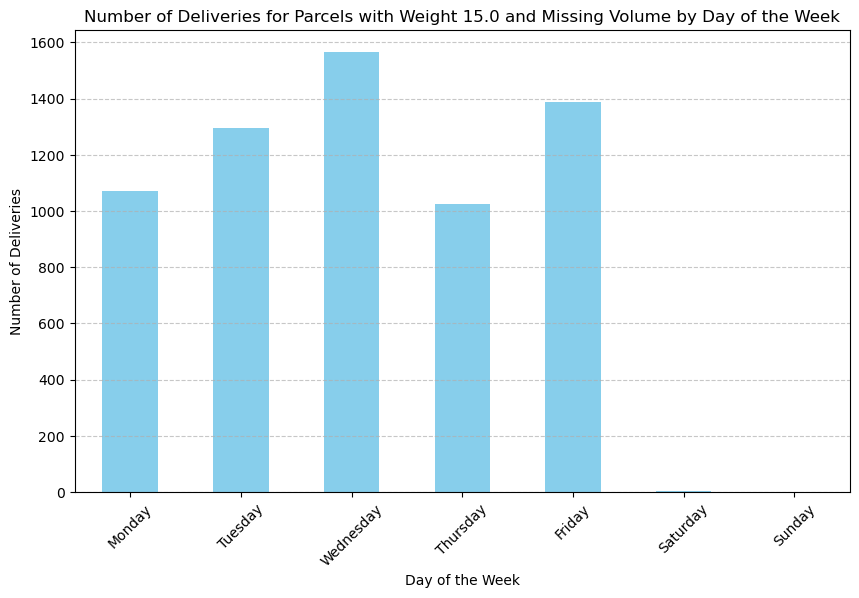

In [732]:
# Filter for parcels with weight exactly 15.0 and missing volume
df_filtered = df_unique[(df_unique['WEIGHT'] == 15.0) & (df_unique['VOLUME'].isna())]

# Extract the day of the week from 'SCAN_DATETIME'
df_filtered['SCAN_DAY_OF_WEEK'] = df_filtered['SCAN_DATETIME'].dt.day_name()

# Count the number of deliveries per day of the week
daily_counts = df_filtered['SCAN_DAY_OF_WEEK'].value_counts()

# Ensure days are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = daily_counts.reindex(day_order, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Deliveries')
plt.title('Number of Deliveries for Parcels with Weight 15.0 and Missing Volume by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyzing Hazardous

In [699]:
# Count the number of hazardous and non-hazardous items
hazardous_counts = df_unique['HAZARDOUS'].value_counts()

# Print the distribution
print("Distribution of Hazardous Items:")
print(hazardous_counts)

Distribution of Hazardous Items:
HAZARDOUS
False    1213921
True        5691
Name: count, dtype: int64


Out of the total number of items, 1,213,921 (99.53%) are classified as non-hazardous, while 5,691 (0.47%) are classified as hazardous, indicating that hazardous items make up a very small fraction of the overall distribution.

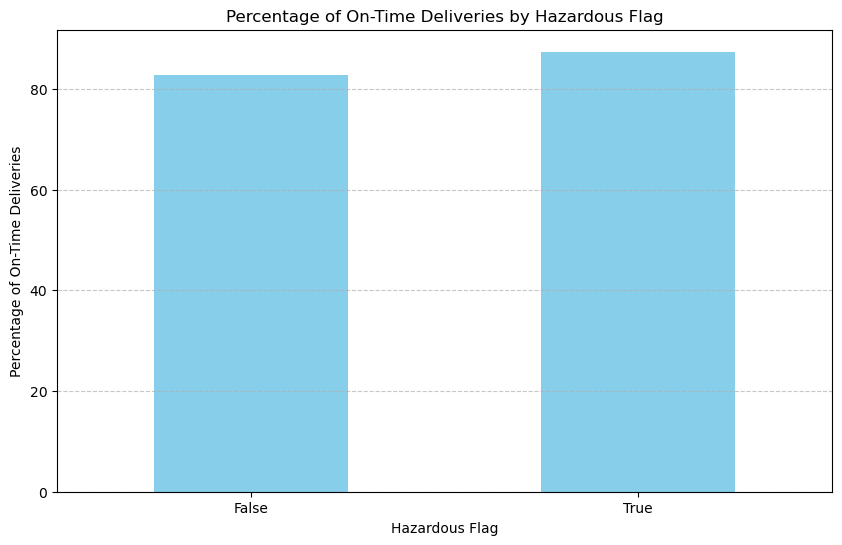

In [688]:
# Calculate the percentage of ON_TIME for each value of HAZARDOUS
hazardous_counts = df_unique.groupby('HAZARDOUS')['ON_TIME'].sum()
total_counts = df_unique.groupby('HAZARDOUS').size()
percentage_on_time = (hazardous_counts / total_counts) * 100

# Plotting
plt.figure(figsize=(10, 6))
percentage_on_time.plot(kind='bar', color='skyblue')
plt.xlabel('Hazardous Flag')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Percentage of On-Time Deliveries by Hazardous Flag')
plt.xticks(rotation=0)  # Ensure x-axis labels are properly aligned
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

If it is hazardous, it is more likely to be delivery on time. Makes sense!

In [740]:
# Calculate average weight for hazardous and non-hazardous parcels
avg_weight_hazardous = df_unique[df_unique['HAZARDOUS'] == True]['WEIGHT'].mean()
avg_weight_non_hazardous = df_unique[df_unique['HAZARDOUS'] == False]['WEIGHT'].mean()

print(f"Average weight of hazardous parcels: {avg_weight_hazardous:.2f}")
print(f"Average weight of non-hazardous parcels: {avg_weight_non_hazardous:.2f}")


Average weight of hazardous parcels: 10.80
Average weight of non-hazardous parcels: 7.08


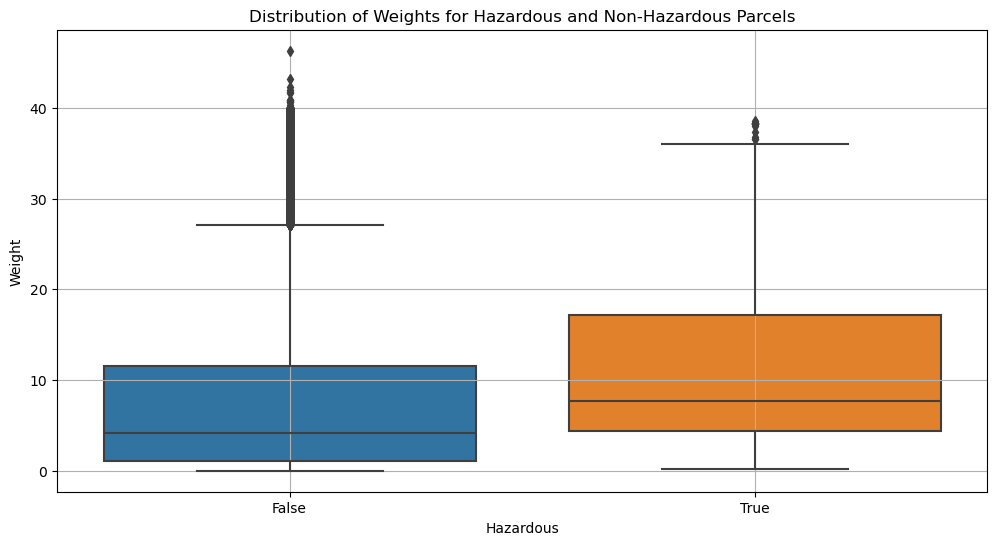

In [743]:
# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='HAZARDOUS', y='WEIGHT', data=df_unique)
plt.title('Distribution of Weights for Hazardous and Non-Hazardous Parcels')
plt.xlabel('Hazardous')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

Hazardous parcels seem to weigh more, on average higher by 3 unit points.

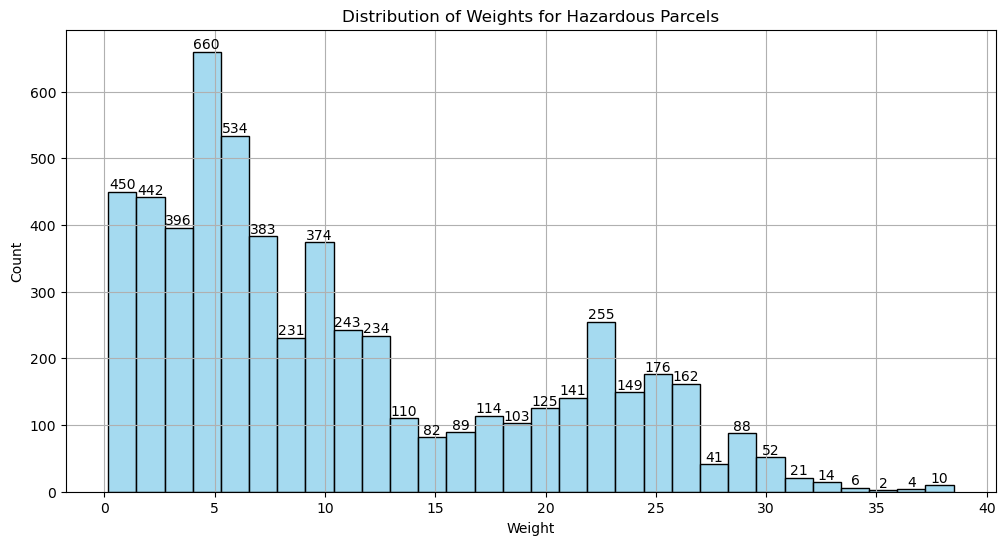

Distribution of Hazardous Parcels by Weight:
   Weight Bin  Count
0       0 - 1    450
1       1 - 2    442
2       2 - 4    396
3       4 - 5    660
4       5 - 6    534
5       6 - 7    383
6       7 - 9    231
7      9 - 10    374
8     10 - 11    243
9     11 - 12    234
10    12 - 14    110
11    14 - 15     82
12    15 - 16     89
13    16 - 18    114
14    18 - 19    103
15    19 - 20    125
16    20 - 21    141
17    21 - 23    255
18    23 - 24    149
19    24 - 25    176
20    25 - 27    162
21    27 - 28     41
22    28 - 29     88
23    29 - 30     52
24    30 - 32     21
25    32 - 33     14
26    33 - 34      6
27    34 - 35      2
28    35 - 37      4
29    37 - 38     10


In [800]:
# Filter hazardous parcels for the entire dataset
hazardous_parcels = df_unique[df_unique['HAZARDOUS']]

# Extract bin edges and counts
bin_edges = [patch.get_x() + patch.get_width() / 2 for patch in hist_plot.patches]
counts = [patch.get_height() for patch in hist_plot.patches]

# Create a DataFrame with the histogram data
hist_df = pd.DataFrame({
    'Weight Bin': [f'{int(patch.get_x())} - {int(patch.get_x() + patch.get_width())}' for patch in hist_plot.patches],
    'Count': counts
})

# Plotting the histogram with annotated counts
plt.figure(figsize=(12, 6))
sns.histplot(hazardous_parcels['WEIGHT'], bins=30, kde=False, color='skyblue')

# Adding labels with values to each bar
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate non-zero heights
        plt.annotate(f'{int(height)}',
                     (patch.get_x() + patch.get_width() / 2, height),
                     ha='center', va='bottom')

plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weights for Hazardous Parcels')
plt.grid(True)

# Show the plot
plt.show()

# Display the DataFrame as a table
print("Distribution of Hazardous Parcels by Weight:")
print(hist_df)

In [745]:
# Convert HAZARDOUS to numeric (0 for False, 1 for True)
df_unique['HAZARDOUS_NUMERIC'] = df_unique['HAZARDOUS'].astype(int)
# Calculate the Pearson correlation coefficient
correlation = df_unique[['HAZARDOUS_NUMERIC', 'WEIGHT']].corr().iloc[0, 1]

print(f"Pearson correlation coefficient between HAZARDOUS and WEIGHT: {correlation:.4f}")


Pearson correlation coefficient between HAZARDOUS and WEIGHT: 0.0346


The positive sign of the coefficient (0.0346) suggests a very slight tendency that as the weight increases, the probability of a parcel being hazardous might slightly increase, but this relationship is so weak that it is not practically significant.

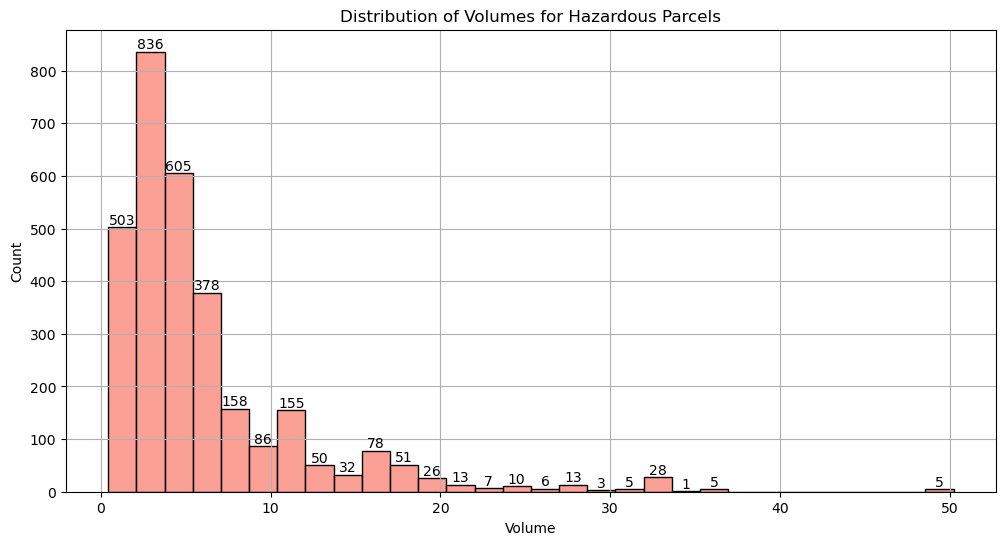

In [791]:
# Filter hazardous parcels for the entire dataset
hazardous_parcels = df_unique[df_unique['HAZARDOUS']]

# Visualize the hazardous parcels by volume
plt.figure(figsize=(12, 6))
hist_plot = sns.histplot(hazardous_parcels['VOLUME'], bins=30, kde=False, color='salmon')

# Adding labels with values
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate non-zero heights
        plt.annotate(f'{int(height)}', 
                     (patch.get_x() + patch.get_width() / 2, height), 
                     ha='center', va='bottom')

plt.xlabel('Volume')
plt.ylabel('Count')
plt.title('Distribution of Volumes for Hazardous Parcels')
plt.grid(True)
plt.show()


Distribution of Hazardous Parcels by Volume:
   Volume Bin  Count
0       0 - 2    503
1       2 - 3    836
2       3 - 5    605
3       5 - 7    378
4       7 - 8    158
5      8 - 10     86
6     10 - 12    155
7     12 - 13     50
8     13 - 15     32
9     15 - 17     78
10    17 - 18     51
11    18 - 20     26
12    20 - 22     13
13    22 - 23      7
14    23 - 25     10
15    25 - 26      6
16    26 - 28     13
17    28 - 30      3
18    30 - 31      5
19    31 - 33     28
20    33 - 35      1
21    35 - 36      5
22    36 - 38      0
23    38 - 40      0
24    40 - 41      0
25    41 - 43      0
26    43 - 45      0
27    45 - 46      0
28    46 - 48      0
29    48 - 50      5


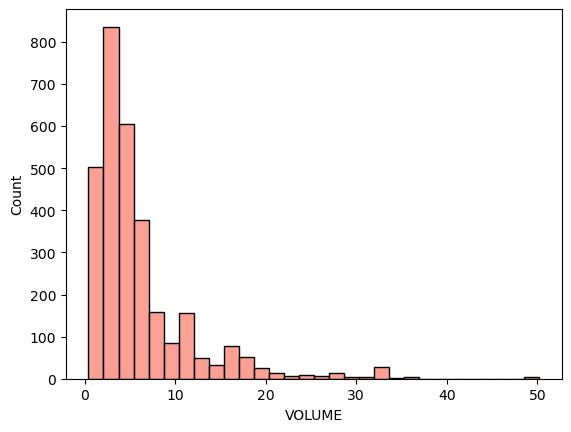

In [795]:
# Calculate the histogram data
hist_data = sns.histplot(hazardous_parcels['VOLUME'], bins=30, kde=False, color='salmon')
bin_edges = hist_data.patches[0].get_x() + hist_data.patches[0].get_width() / 2
counts = [patch.get_height() for patch in hist_data.patches]

# Create a DataFrame with the histogram data
hist_df = pd.DataFrame({
    'Volume Bin': [f'{int(hist_data.patches[i].get_x())} - {int(hist_data.patches[i].get_x() + hist_data.patches[i].get_width())}' for i in range(len(hist_data.patches))],
    'Count': counts
})
# Display the DataFrame as a table
print("Distribution of Hazardous Parcels by Volume:")
print(hist_df)

## The most hazardous parcels have a weight and volume smaller than 10.

In [753]:
# Ensure 'HAZARDOUS' is boolean if not already
df_unique['HAZARDOUS'] = df_unique['HAZARDOUS'].astype(bool)

# Group by 'DEPOT' and calculate counts
depot_stats = df_unique.groupby('DESTINATION_DEPOT_ID')['HAZARDOUS'].agg(['sum', 'count']).reset_index()
depot_stats.columns = ['DESTINATION_DEPOT_ID', 'Hazardous_Count', 'Total_Count']

# Calculate percentage of hazardous parcels
depot_stats['Percentage_Hazardous'] = (depot_stats['Hazardous_Count'] / depot_stats['Total_Count']) * 100

# Print results
print(depot_stats)

   DESTINATION_DEPOT_ID  Hazardous_Count  Total_Count  Percentage_Hazardous
0                   100             2166       412553              0.525023
1                   120              978       184837              0.529115
2                   170             1364       342073              0.398745
3                   230             1183       280149              0.422275


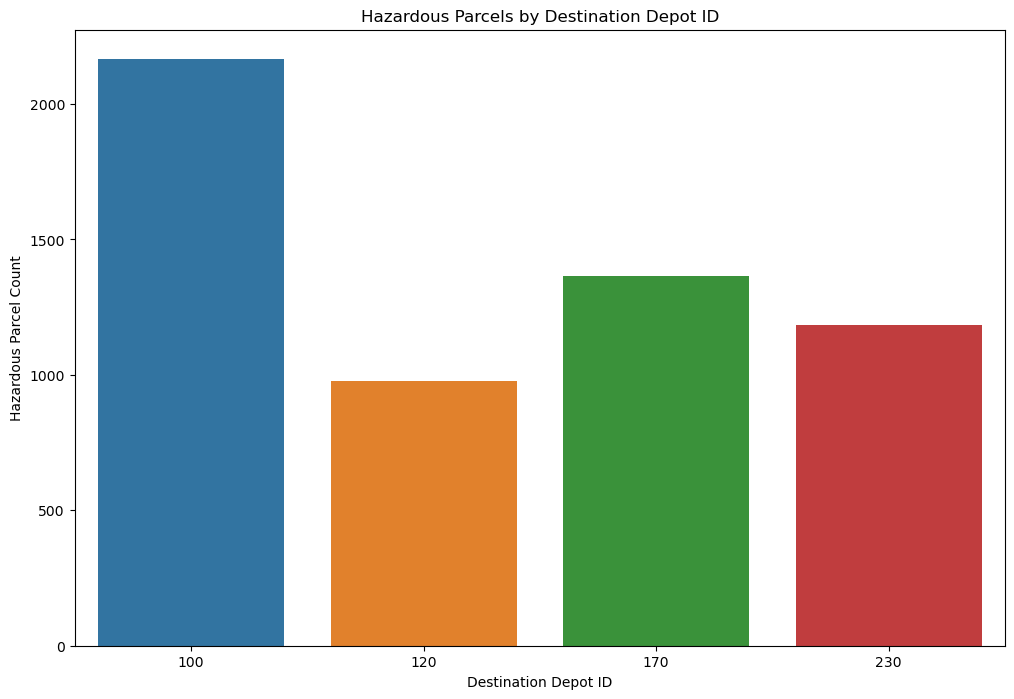

In [766]:
# Ensure 'HAZARDOUS' is boolean if not already
df_unique['HAZARDOUS'] = df_unique['HAZARDOUS'].astype(bool)

# Group by 'DEPOT' and calculate counts
depot_stats = df_unique.groupby('DESTINATION_DEPOT_ID')['HAZARDOUS'].agg(['sum', 'count']).reset_index()
depot_stats.columns = ['DESTINATION_DEPOT_ID', 'Hazardous_Count', 'Total_Count']

# Calculate percentage of hazardous parcels
depot_stats['Percentage_Hazardous'] = (depot_stats['Hazardous_Count'] / depot_stats['Total_Count']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a bar plot for the count of hazardous parcels
sns.barplot(x='DESTINATION_DEPOT_ID', y='Hazardous_Count', data=depot_stats, ax=ax1)
ax1.set_xlabel('Destination Depot ID')
ax1.set_ylabel('Hazardous Parcel Count')
ax1.tick_params(axis='y')
ax1.set_title('Hazardous Parcels by Destination Depot ID')

# Show the plot
plt.show()

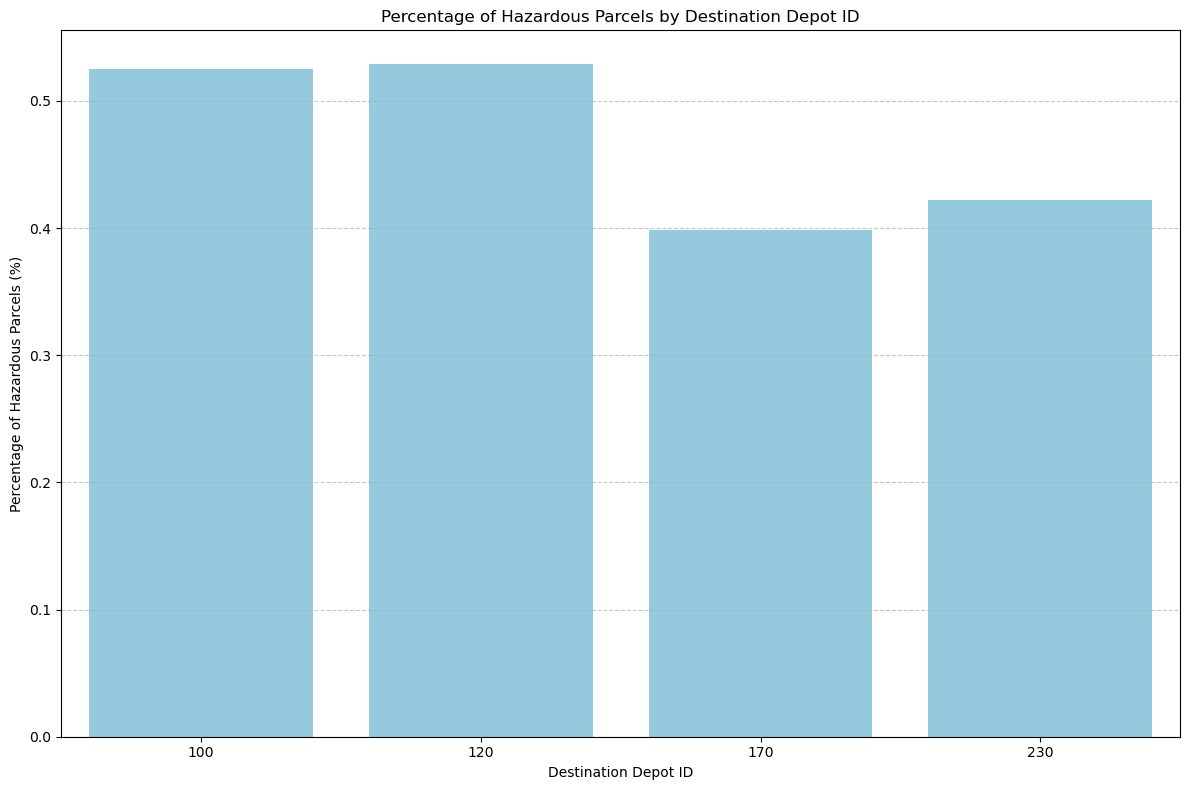

In [770]:
# Ensure 'HAZARDOUS' is boolean if not already
df_unique['HAZARDOUS'] = df_unique['HAZARDOUS'].astype(bool)

# Group by 'DEPOT' and calculate counts
depot_stats = df_unique.groupby('DESTINATION_DEPOT_ID')['HAZARDOUS'].agg(['sum', 'count']).reset_index()
depot_stats.columns = ['DESTINATION_DEPOT_ID', 'Hazardous_Count', 'Total_Count']

# Calculate percentage of hazardous parcels
depot_stats['Percentage_Hazardous'] = (depot_stats['Hazardous_Count'] / depot_stats['Total_Count']) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot for the percentage of hazardous parcels
sns.barplot(x='DESTINATION_DEPOT_ID', y='Percentage_Hazardous', data=depot_stats, color='skyblue')

# Customize the plot
plt.xlabel('Destination Depot ID')
plt.ylabel('Percentage of Hazardous Parcels (%)')
plt.title('Percentage of Hazardous Parcels by Destination Depot ID')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

We do not have a lot of hazardous parcels so the percentages of hazardous parcels is low for all depots (around 0.5%) but it is the highest for depot 120 even though in absolute numbers, depot 120 has the lower number of hazardous parcels

Total parcels in Depot 120: 184837
Number of hazardous parcels in Depot 120: 978
Percentage of hazardous parcels in Depot 120: 0.53%


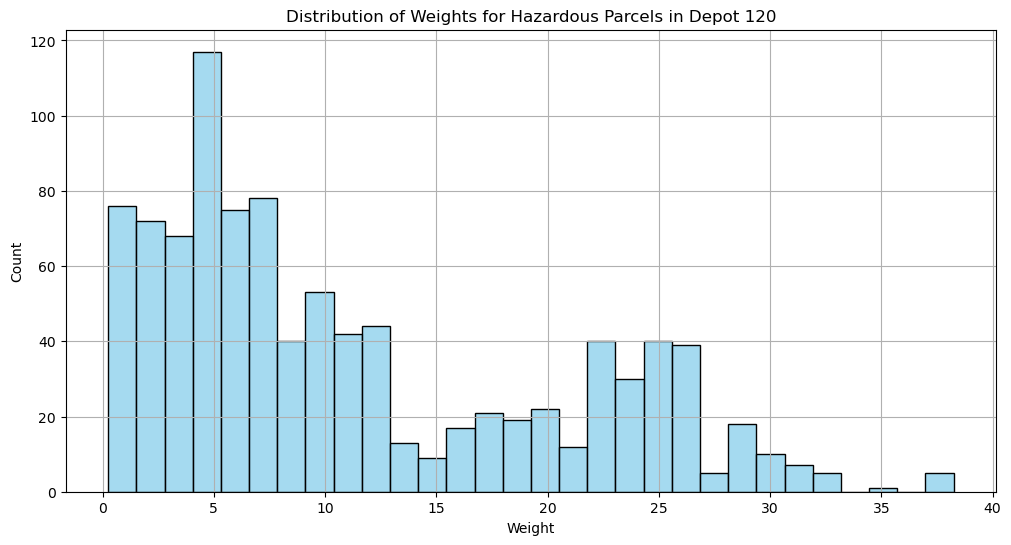

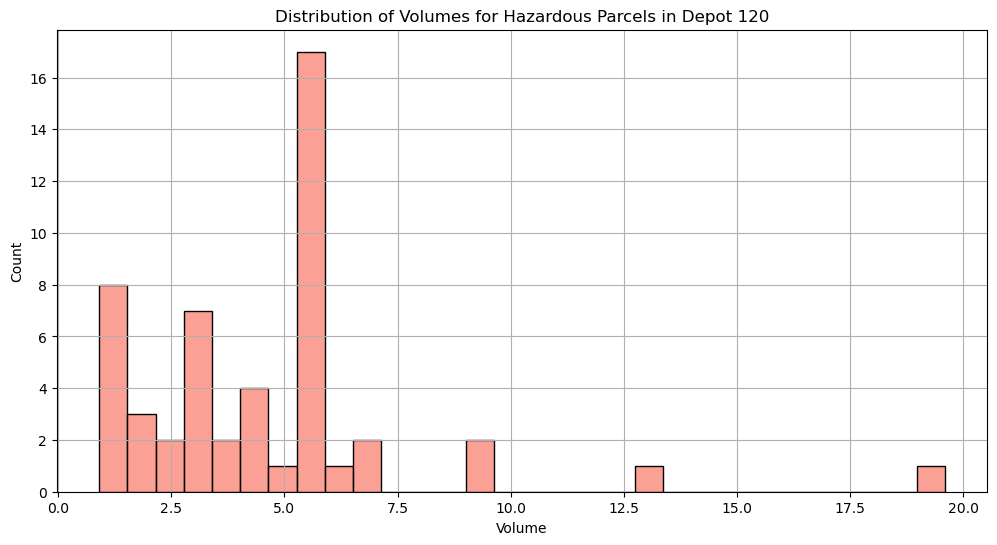

In [773]:
# Ensure 'HAZARDOUS' is boolean if not already
df_unique['HAZARDOUS'] = df_unique['HAZARDOUS'].astype(bool)

# Filter data for Depot 120
depot_120 = df_unique[df_unique['DESTINATION_DEPOT_ID'] == 120]

# Analyze hazardous parcels
hazardous_parcels_120 = depot_120[depot_120['HAZARDOUS']]

# Count hazardous parcels
hazardous_count = hazardous_parcels_120.shape[0]
total_count = depot_120.shape[0]
percentage_hazardous = (hazardous_count / total_count) * 100

# Print the basic statistics
print(f"Total parcels in Depot 120: {total_count}")
print(f"Number of hazardous parcels in Depot 120: {hazardous_count}")
print(f"Percentage of hazardous parcels in Depot 120: {percentage_hazardous:.2f}%")

# Visualize the hazardous parcels by weight
plt.figure(figsize=(12, 6))
sns.histplot(hazardous_parcels_120['WEIGHT'], bins=30, kde=False, color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weights for Hazardous Parcels in Depot 120')
plt.grid(True)
plt.show()

# Visualize the hazardous parcels by volume (if volume is available)
if 'VOLUME' in depot_120.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(hazardous_parcels_120['VOLUME'], bins=30, kde=False, color='salmon')
    plt.xlabel('Volume')
    plt.ylabel('Count')
    plt.title('Distribution of Volumes for Hazardous Parcels in Depot 120')
    plt.grid(True)
    plt.show()
else:
    print("Volume data is not available in the dataset.")

The results are similar to those of all 4 depots. 

# Analyzing SMALL

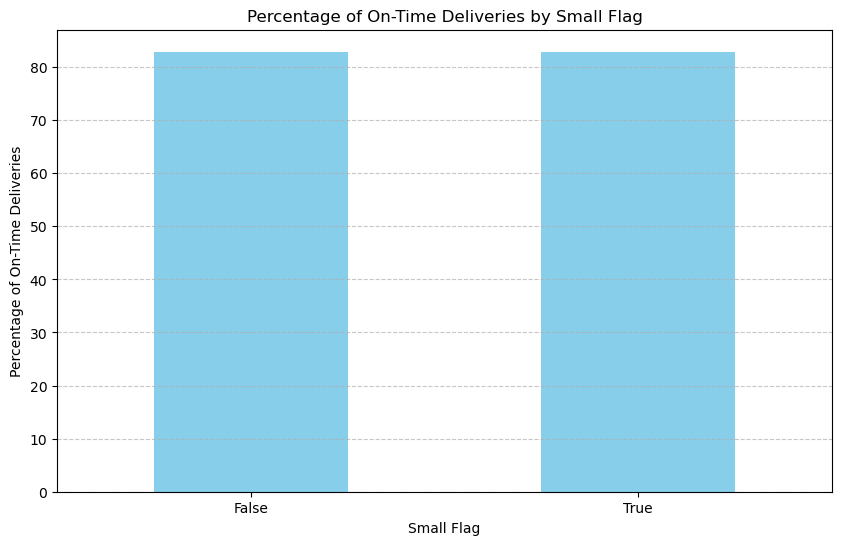

In [632]:
# Calculate the percentage of on_time for each value of small_flag
small_flag_counts = df_unique.groupby('SMALL')['ON_TIME'].sum()
total_counts = df_unique.groupby('SMALL').size()
percentage_on_time = (small_flag_counts / total_counts) * 100

# Plot the results
plt.figure(figsize=(10, 6))
percentage_on_time.plot(kind='bar', color='skyblue')
plt.xlabel('Small Flag')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Percentage of On-Time Deliveries by Small Flag')
plt.xticks(rotation=0)  # Ensure x-axis labels are properly aligned
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Whether small or large, parcels have a very similar percentage of on_time deliveries: a little over 80

In [635]:
# Count the number of True and False values for 'SMALL'
small_counts = df_unique['SMALL'].value_counts()

# Calculate the percentages
total_count = len(df_unique)
small_percentages = (small_counts / total_count) * 100

# Combine the counts and percentages into a DataFrame
small_summary = pd.DataFrame({
    'Count': small_counts,
    'Percentage': small_percentages
}).reset_index()

# Rename the columns for better readability
small_summary.columns = ['SMALL', 'Count', 'Percentage']

# Display the table
print(small_summary)

   SMALL   Count  Percentage
0  False  832584   68.266301
1   True  387028   31.733699


We have more big parcels than small parcels (68% VS 32%)

In [749]:
# Encode the boolean 'SMALL' column to numeric
df_unique['SMALL_NUMERIC'] = df_unique['SMALL'].astype(int)

# Calculate the Pearson correlation coefficient
correlation = df_unique['SMALL_NUMERIC'].corr(df_unique['WEIGHT'])

print(f"Pearson correlation coefficient between SMALL and WEIGHT: {correlation:.4f}")

Pearson correlation coefficient between SMALL and WEIGHT: -0.5473


A value of −0.5473 suggests a moderate negative correlation between the SMALL variable and WEIGHT. There is a tendency for smaller weights to be associated with SMALL being true (indicating the parcel is small), while larger weights are less likely to be small. This makes intuitive sense if SMALL denotes lighter or less bulky items, which would generally have lower weights.

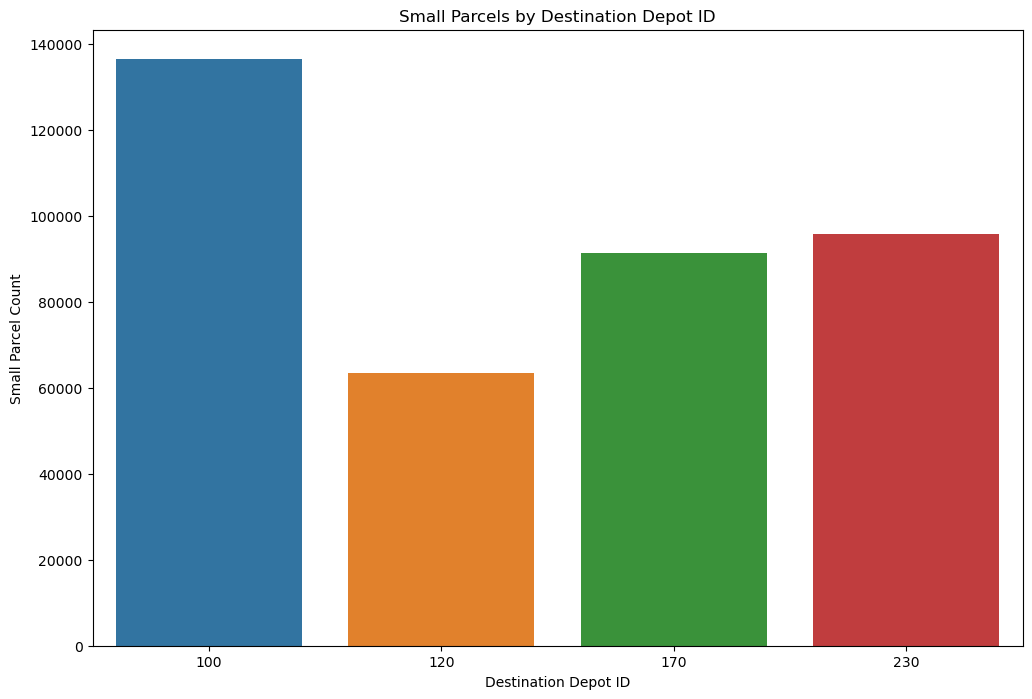

In [804]:
# Ensure 'HAZARDOUS' is boolean if not already
df_unique['SMALL'] = df_unique['SMALL'].astype(bool)

# Group by 'DEPOT' and calculate counts
depot_stats = df_unique.groupby('DESTINATION_DEPOT_ID')['SMALL'].agg(['sum', 'count']).reset_index()
depot_stats.columns = ['DESTINATION_DEPOT_ID', 'Small_Count', 'Total_Count']

# Calculate percentage of hazardous parcels
depot_stats['Percentage_Small'] = (depot_stats['Small_Count'] / depot_stats['Total_Count']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a bar plot for the count of hazardous parcels
sns.barplot(x='DESTINATION_DEPOT_ID', y='Small_Count', data=depot_stats, ax=ax1)
ax1.set_xlabel('Destination Depot ID')
ax1.set_ylabel('Small Parcel Count')
ax1.tick_params(axis='y')
ax1.set_title('Small Parcels by Destination Depot ID')

# Show the plot
plt.show()

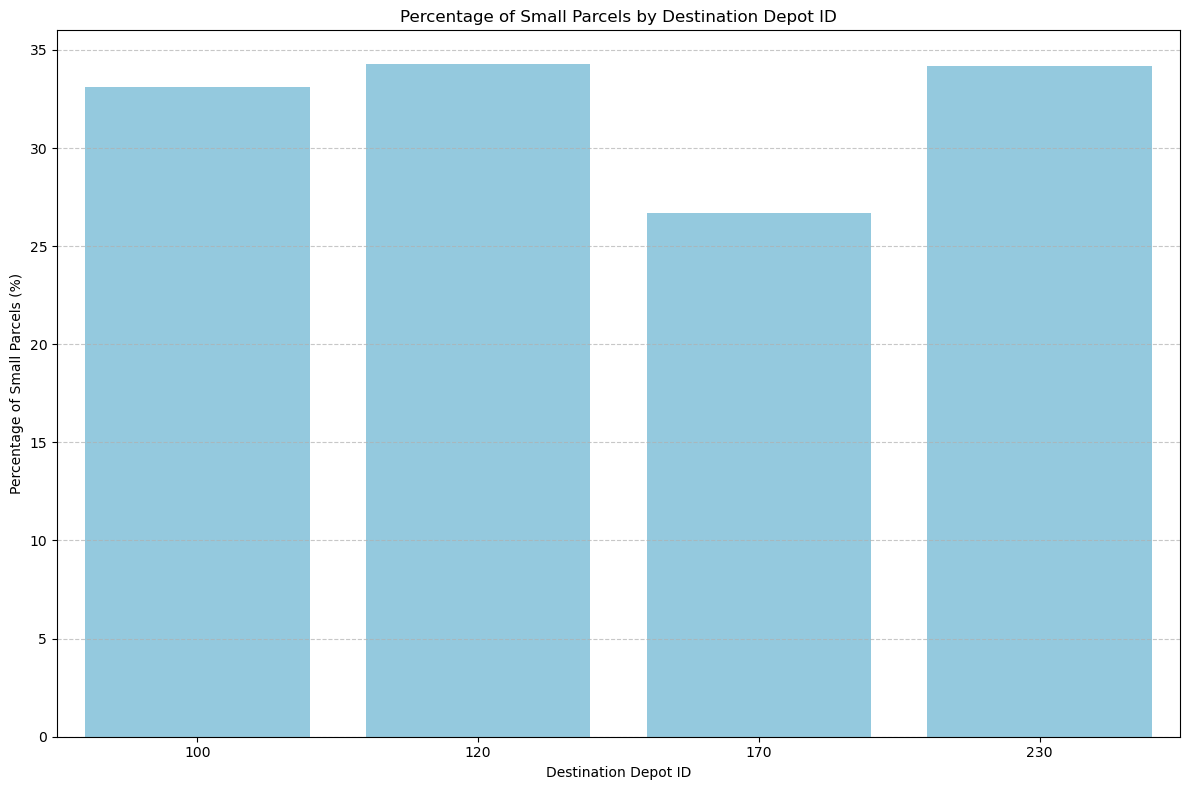

In [806]:
# Ensure 'SMALL' is boolean if not already
df_unique['SMALL'] = df_unique['SMALL'].astype(bool)

# Group by 'DEPOT' and calculate counts
depot_stats = df_unique.groupby('DESTINATION_DEPOT_ID')['SMALL'].agg(['sum', 'count']).reset_index()
depot_stats.columns = ['DESTINATION_DEPOT_ID', 'Small_Count', 'Total_Count']

# Calculate percentage of small parcels
depot_stats['Percentage_Small'] = (depot_stats['Small_Count'] / depot_stats['Total_Count']) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot for the percentage of small parcels
sns.barplot(x='DESTINATION_DEPOT_ID', y='Percentage_Small', data=depot_stats, color='skyblue')

# Customize the plot
plt.xlabel('Destination Depot ID')
plt.ylabel('Percentage of Small Parcels (%)')
plt.title('Percentage of Small Parcels by Destination Depot ID')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


We see that depot 120 has most hazardous parcels and most small parcels. Is there a correlation between these 2 characteristics?

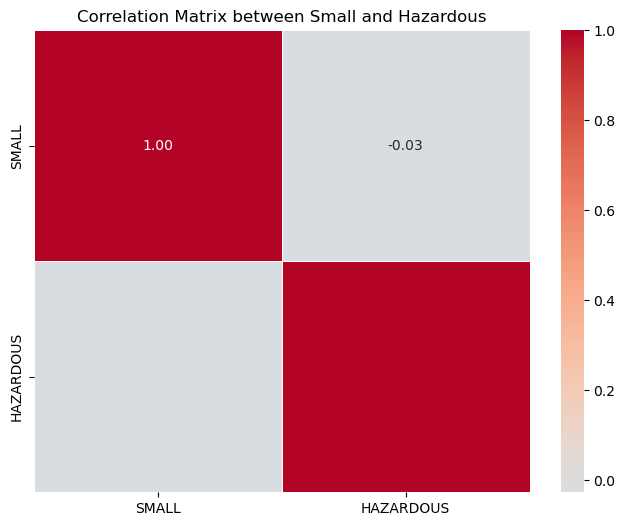

In [1042]:
# Ensure 'SMALL' and 'HAZARDOUS' are numeric
df_unique['SMALL'] = pd.to_numeric(df_unique['SMALL'], errors='coerce')
df_unique['HAZARDOUS'] = pd.to_numeric(df_unique['HAZARDOUS'], errors='coerce')

# Drop rows with NaN values to avoid issues in correlation calculation
df_clean = df_unique.dropna(subset=['SMALL', 'HAZARDOUS'])

# Compute the correlation matrix
correlation_matrix = df_clean[['SMALL', 'HAZARDOUS']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Small and Hazardous')
plt.show()

A correlation coefficient of -0.03 between the variables SMALL and HAZARDOUS suggests that there is a very weak negative linear relationship between them. This value is close to zero, indicating that there is little to no linear association between the two variables.

In [1046]:
# Convert the columns to boolean type for clarity
df_clean['SMALL'] = df_clean['SMALL'].astype(bool)
df_clean['HAZARDOUS'] = df_clean['HAZARDOUS'].astype(bool)

# Create a cross-tabulation (contingency table)
contingency_table = pd.crosstab(df_clean['HAZARDOUS'], df_clean['SMALL'], margins=True, margins_name="Total")

# Display the table
contingency_table.columns = ['Small False', 'Small True', 'Total']
contingency_table.index = ['Hazardous False', 'Hazardous True', 'Total']
print(contingency_table)

                 Small False  Small True    Total
Hazardous False       827655      386266  1213921
Hazardous True          4929         762     5691
Total                 832584      387028  1219612


In [1048]:
# Calculate percentage table
percentage_table = contingency_table.div(contingency_table.loc['Total', 'Total']).mul(100).round(2)
print("\nPercentage Table:")
print(percentage_table)


Percentage Table:
                 Small False  Small True   Total
Hazardous False        67.86       31.67   99.53
Hazardous True          0.40        0.06    0.47
Total                  68.27       31.73  100.00


The results show that this correlation might not be relevant. Only a very small percentage of parcels are both small and hazardous (0.06%) but the largest chunk are neither small or hazardous (67.85%)

/var/folders/6s/jtyjmwvn4wz6q7x39lwzwzsm0000gn/T/ipykernel_47187/1347578936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['on_time_int'] = df_unique['on_time'].astype(int)


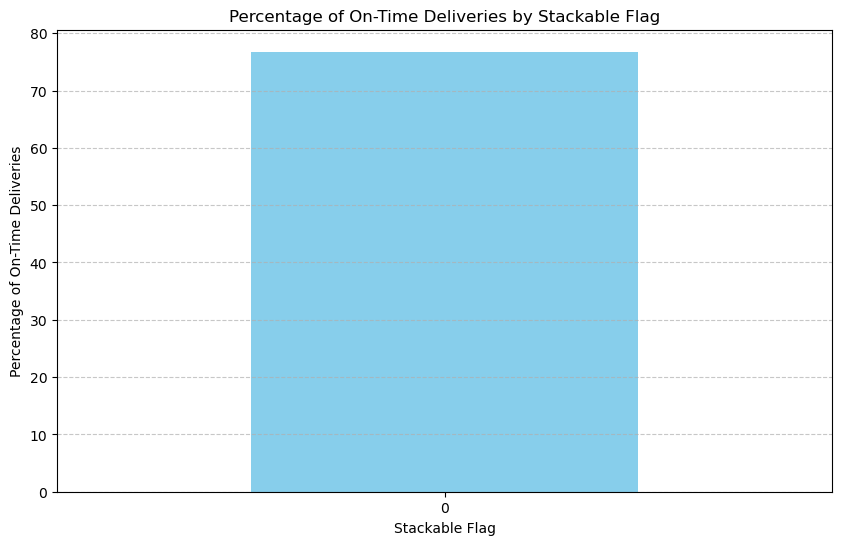

In [229]:
# Drop duplicate UNITNO entries, keeping only the first occurrence
df_unique = df.drop_duplicates(subset='UNITNO', keep='first')

# Convert 'on_time' to integer (1 for True, 0 for False) for summation
df_unique['on_time_int'] = df_unique['on_time'].astype(int)

# Calculate the percentage of on_time for each value of STACKABLE
stackable_counts = df_unique.groupby('STACKABLE')['on_time_int'].sum()
total_stackable_counts = df_unique.groupby('STACKABLE').size()
percentage_on_time_stackable = (stackable_counts / total_stackable_counts) * 100

# Plot the results
plt.figure(figsize=(10, 6))
percentage_on_time_stackable.plot(kind='bar', color='skyblue')
plt.xlabel('Stackable Flag')
plt.ylabel('Percentage of On-Time Deliveries')
plt.title('Percentage of On-Time Deliveries by Stackable Flag')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [230]:
# Drop duplicate UNITNO entries, keeping only the first occurrence
df_unique = df.drop_duplicates(subset='UNITNO', keep='first')

# Count the number of True and False values for 'STACKABLE'
stackable_counts = df_unique['STACKABLE'].value_counts()

# Calculate the percentages
total_count = len(df_unique)
stackable_percentages = (stackable_counts / total_count) * 100

# Combine the counts and percentages into a DataFrame
stackable_summary = pd.DataFrame({
    'Count': stackable_counts,
    'Percentage': stackable_percentages
}).reset_index()

# Rename the columns for better readability
stackable_summary.columns = ['STACKABLE', 'Count', 'Percentage']

# Display the table
print(stackable_summary)

   STACKABLE     Count  Percentage
0          0  15648659       100.0


# Other questions, average delivery time for the data

In [646]:
# Calculate delivery time in hours
df_unique['delivery_time_hours'] = (df_unique['DESTINATION_SCAN_DATETIME'] - df_unique['FIRST_SCAN_DATETIME']).dt.total_seconds() / 3600

# Average delivery time
average_delivery_time = df_unique['delivery_time_hours'].mean()
print(f"Average delivery time: {average_delivery_time:.2f} hours for parcels")

Average delivery time: 28.08 hours for parcels


In [648]:
# On-time delivery by destination depot
on_time_delivery_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['ON_TIME'].mean().sort_values()
print("On-time delivery rate by depot for NOT REPEATED parcels:")
print(on_time_delivery_by_depot)

On-time delivery rate by depot for NOT REPEATED parcels:
DESTINATION_DEPOT_ID
120    0.736416
170    0.792682
230    0.850701
100    0.884752
Name: ON_TIME, dtype: float64


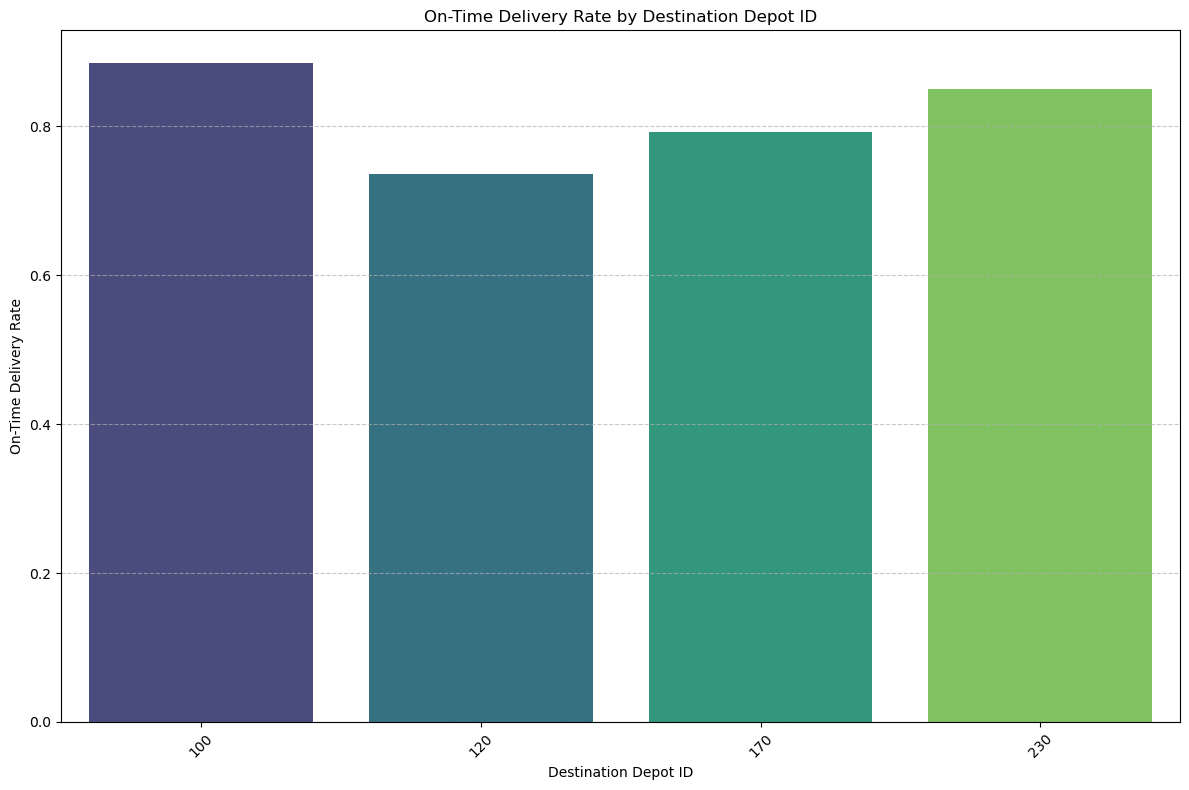

In [810]:
# Calculate the on-time delivery rate by destination depot
on_time_delivery_by_depot = df_unique.groupby('DESTINATION_DEPOT_ID')['ON_TIME'].mean().sort_values().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot for the on-time delivery rate by destination depot
sns.barplot(x='DESTINATION_DEPOT_ID', y='ON_TIME', data=on_time_delivery_by_depot, palette='viridis')

# Customize the plot
plt.xlabel('Destination Depot ID')
plt.ylabel('On-Time Delivery Rate')
plt.title('On-Time Delivery Rate by Destination Depot ID')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### Depot 120 shows the worst results in terms of on-time delivery, why so? It does have the lowest amount of deliveries in absolute terms so what is so special about thoose parcels?

# Linear regression

In [858]:
# Prepare the data
df_unique = df_unique.dropna(subset=['ON_TIME'])  # Ensure no missing ON_TIME values

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_unique, columns=['DESTINATION_DEPOT_ID'])

# Drop duplicate columns
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Define the target and predictors
X = df_encoded[['WEIGHT', 'VOLUME', 'SMALL', 'HAZARDOUS', 'DESTINATION_DEPOT_ID_100', 'DESTINATION_DEPOT_ID_120', 'DESTINATION_DEPOT_ID_170', 'DESTINATION_DEPOT_ID_230']]
y = df_encoded['ON_TIME']

# Handle missing values in the predictors
X['VOLUME'].fillna(X['VOLUME'].mean(), inplace=True)  # Replace missing VOLUME with mean

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Print coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.13866405490864733
R^2 Score: 0.02579745283754653
                          Coefficient
WEIGHT                      -0.004863
VOLUME                       0.000002
SMALL                       -0.045205
HAZARDOUS                    0.054747
DESTINATION_DEPOT_ID_100     0.067614
DESTINATION_DEPOT_ID_120    -0.081394
DESTINATION_DEPOT_ID_170    -0.019492
DESTINATION_DEPOT_ID_230     0.033272


The low R² score and the generally small coefficients suggest that the variables included in the model do not have a strong predictive power for determining whether a parcel will be delivered on time. The most notable variable is HAZARDOUS, which has a slightly larger positive impact, but overall, the effect sizes are small and the model explains only a small fraction of the variance in the on-time delivery rate. There may be other factors, perhaps operational or external, that are not captured by the current set of predictors and could be influencing the on-time delivery outcomes.

# Logit model because On_Time is boolean

In [879]:
# Drop rows with missing ON_TIME values
df_unique = df_unique.dropna(subset=['ON_TIME'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_unique, columns=['DESTINATION_DEPOT_ID'])

# Drop duplicate columns
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Define the target and predictors
X = df_encoded[['WEIGHT', 'VOLUME', 'SMALL', 'HAZARDOUS', 'DESTINATION_DEPOT_ID_100', 'DESTINATION_DEPOT_ID_120', 'DESTINATION_DEPOT_ID_170', 'DESTINATION_DEPOT_ID_230']]
y = df_encoded['ON_TIME']

# Handle missing values in the predictors
X['VOLUME'].fillna(X['VOLUME'].mean(), inplace=True)  # Replace missing VOLUME with mean

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Print coefficients
coefficients = pd.DataFrame(model.coef_, columns=X.columns, index=['Coefficient'])
print(coefficients.T)



Accuracy: 0.8281055906987042
Confusion Matrix:
[[     1  41924]
 [     5 201993]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.00      0.00     41925
           1       0.83      1.00      0.91    201998

    accuracy                           0.83    243923
   macro avg       0.50      0.50      0.45    243923
weighted avg       0.71      0.83      0.75    243923

                          Coefficient
WEIGHT                      -0.033330
VOLUME                       0.000012
SMALL                       -0.331122
HAZARDOUS                    0.429568
DESTINATION_DEPOT_ID_100     0.877694
DESTINATION_DEPOT_ID_120    -0.146584
DESTINATION_DEPOT_ID_170     0.206951
DESTINATION_DEPOT_ID_230     0.573589


The logistic regression model achieved an overall accuracy of approximately 82.81%, indicating that it correctly predicted the outcome for about 83% of the observations. However, there is a high imbalance: This result shows that the model is highly biased towards predicting the positive class (class 1). While it correctly identifies most positive cases, it fails to predict negative cases (class 0), with a recall of 0.00 for the negative class. This indicates that the model almost never predicts the negative class correctly, leading to a precision of 0.17 and an F1-score of 0.00 for class 0. In contrast, for the positive class, the model achieves a high recall of 1.00, meaning it correctly identifies nearly all positive cases, with a precision of 0.83 and an F1-score of 0.91.

- WEIGHT: A slight negative effect, suggesting that heavier shipments are slightly less likely to be on time.
- VOLUME: A very small positive effect, indicating minimal impact of volume on the probability of being on time.
- SMALL: A negative coefficient, suggesting that small shipments are less likely to be on time.
- HAZARDOUS: A positive effect, meaning hazardous shipments have a higher probability of being on time.
- DESTINATION DEPOTS: The coefficients for various depots show different levels of association with the probability of being on time, with some depots (e.g., DESTINATION_DEPOT_ID_100 and DESTINATION_DEPOT_ID_230) having higher positive coefficients.